<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-teammexcol/blob/main/Reto_Proyecto_Final/TeamMexCol_A_Subterraneas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Ciencia y analítica de datos**
###Tecnológico de Monterrey
###Profesor: Roberto Antonio Guevara González

**Nombres y matrículas de los integrantes del equipo:**

*   Victor Alejandro Regueira Romero (A01794404)
*   Carlos Julio León Caicedo (A01793947)

# **Entrega 1: 16 de noviembre**

## **Limpieza, análisis, visualización**

En esta base de datos encontrarás:
* Aguas subterraneas.
* Aguas superficiales.

1. Elige una base de datos, ya sea la de aguas superficiales o la de aguas subterraneas.

2. Explorar los datos (auxiliate de describe(), mean(), plot, boxplot de pandas):
* Identificando tendencias centrales promedio, media y mediana de los datos. 
* Identificar medidas de dispersión, máximo, mínimo .
* Identificar medidas de posición no centrales , los cuartiles , outliers.   
* Identificar correlaciones.
* Preparar los datos 
* Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.
* Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.

### Importamos las librerías a utilizar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from sklearn.model_selection import train_test_split #Para hacer las particiones
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score         
from sklearn.metrics import classification_report, make_scorer
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor


In [2]:
#Instalamos libreria para trabajar con mapas
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 35.4 MB/s 
     |████████████████████████████████| 1.0 MB 43.6 MB/s 
     |████████████████████████████████| 1.7 MB 44.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 50.2 MB/s 
     |████████████████████████████████| 6.3 MB 36.5 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=560d6192b26871fbeb5b686c7b55db310e0c68e0bf1eb61f9687ece610822b56
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=bd14ccb2020fcbac336b7d1a7ecb67929c2f7af87b4da5ef646aecf027675e50
  Stored in directory: /root/

In [3]:
import geopandas as gpd
from shapely.geometry import Point


### Importamos los datos

In [4]:
#Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv
#Usamos el url de  nuestro Dataset subido al Github
url = 'https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-teammexcol/main/Reto_Proyecto_Final/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'
df_sub_origen = pd.read_csv(url, encoding = 'latin1')
df_sub_origen.head()

CLAVE                   SITIO           ORGANISMO_DE_CUENCA  \
0     DLAGU6            POZO SAN GIL       LERMA SANTIAGO PACIFICO   
1  DLAGU6516  POZO R013 CAÑADA HONDA       LERMA SANTIAGO PACIFICO   
2     DLAGU7              POZO COSIO       LERMA SANTIAGO PACIFICO   
3     DLAGU9      POZO EL SALITRILLO       LERMA SANTIAGO PACIFICO   
4   DLBAJ107      RANCHO EL TECOLOTE  PENINSULA DE BAJA CALIFORNIA   

                ESTADO        MUNICIPIO                 ACUIFERO SUBTIPO  \
0       AGUASCALIENTES         ASIENTOS       VALLE DE CHICALOTE    POZO   
1       AGUASCALIENTES   AGUASCALIENTES       VALLE DE CHICALOTE    POZO   
2       AGUASCALIENTES            COSIO  VALLE DE AGUASCALIENTES    POZO   
3       AGUASCALIENTES  RINCON DE ROMOS  VALLE DE AGUASCALIENTES    POZO   
4  BAJA CALIFORNIA SUR           LA PAZ             TODOS SANTOS    POZO   

    LONGITUD   LATITUD  PERIODO  ...  CUMPLE_CON_DUR CUMPLE_CON_CF  \
0 -102.02210  22.20887     2020  ...              SI            SI   
1 -102.20075  21.99958     2020  ...              SI            SI   
2 -102.28801  22.36685     2020  ...              SI            SI   
3 -102.29449  22.18435     2020  ...              SI            SI   
4 -110.24480  23.45138     2020  ...              SI            SI   

   CUMPLE_CON_NO3 CUMPLE_CON_AS  CUMPLE_CON_CD CUMPLE_CON_CR CUMPLE_CON_HG  \
0              SI            SI             SI            SI            SI   
1              SI            SI             SI            SI            SI   
2              SI            NO             SI            SI            SI   
3              SI            SI             SI            SI            SI   
4              NO            SI             SI            SI            SI   

  CUMPLE_CON_PB CUMPLE_CON_MN CUMPLE_CON_FE  
0            SI            SI            SI  
1            SI            SI            SI  
2            SI            SI            SI  
3            SI            SI            SI  
4            SI            SI            SI  

[5 rows x 57 columns]

### Análisis general de los datos

In [5]:
df_agua_sub = df_sub_origen.copy()
df_agua_sub.sample(7)

CLAVE                            SITIO  \
439    DLQUE5321                     HORNO DE CAL   
632    OCBAL2852      EL TERRERO (RIEGO AGRICOLA)   
655  OCCCN5226M1  POZO 4983 EL VIDO (LA SOCIEDAD)   
962    OCPSU4868                     POZO EL SAUZ   
319    DLGUA1195            VALLE DE LA CUEVITA 3   
946    OCPNO4606                      EJIDO DIMAS   
222     DLDUR712      POZO SAN ISIDRO DE MURILLOS   

             ORGANISMO_DE_CUENCA             ESTADO  \
439                  GOLFO NORTE  QUERETARO ARTEAGA   
632                       BALSAS            MORELOS   
655  CUENCAS CENTRALES DEL NORTE            DURANGO   
962                 PACIFICO SUR             OAXACA   
319      LERMA SANTIAGO PACIFICO         GUANAJUATO   
946               PACIFICO NORTE            SINALOA   
222               PACIFICO NORTE            DURANGO   

                              MUNICIPIO                 ACUIFERO SUBTIPO  \
439                             TOLIMAN                  TOLIMAN    POZO   
632                           MIACATLAN                ZACATEPEC    POZO   
655                               NAZAS                    NAZAS    POZO   
962  HEROICA CIUDAD DE EJUTLA DE CRESPO         RIO VERDE-EJUTLA   NORIA   
319                           JERECUARO      VALLE DE LA CUEVITA    POZO   
946                         SAN IGNACIO              RIO PIAXTLA    POZO   
222                    VICENTE GUERRERO  VICENTE GUERRERO-POANAS    POZO   

       LONGITUD    LATITUD  PERIODO  ...  CUMPLE_CON_DUR CUMPLE_CON_CF  \
439  -99.923085  20.897297     2020  ...              SI            SI   
632  -99.370270  18.767670     2020  ...              SI            SI   
655 -103.907400  25.252100     2020  ...              NO            SI   
962  -96.751900  16.516900     2020  ...              SI            SI   
319 -100.470760  20.363990     2020  ...              SI            SI   
946 -106.768890  23.733240     2020  ...              SI            SI   
222 -104.058860  23.683580     2020  ...              SI            SI   

     CUMPLE_CON_NO3 CUMPLE_CON_AS  CUMPLE_CON_CD CUMPLE_CON_CR CUMPLE_CON_HG  \
439              SI            SI             SI            SI            SI   
632              SI            SI             SI            SI            SI   
655              NO            SI             SI            SI            SI   
962              SI            SI             SI            NO            SI   
319              SI            SI             SI            SI            SI   
946              SI            SI             SI            SI            SI   
222              SI            SI             SI            SI            SI   

    CUMPLE_CON_PB CUMPLE_CON_MN CUMPLE_CON_FE  
439            SI            SI            SI  
632            SI            SI            SI  
655            SI            SI            SI  
962            SI            SI            SI  
319            SI            SI            SI  
946            SI            NO            SI  
222            SI            SI            SI  

[7 rows x 57 columns]

In [6]:
df_agua_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

* El Dataset tiene valores nulos, esto lo vemos al observar el número de registros que tiene cada variable.
* Tenemos un total de **57 variables** y **1068 registros**
* Nuestras variables son tipo flotante, entero y objeto (*Debemos de hacer un análisis más a profundidad de esas variables objeto*)

### Análisis de Nulos

In [7]:
df_agua_sub.isna().sum().sort_values(ascending=False) #los nulos de forma descendente


SDT_mg/L                1068
CONTAMINANTES            434
CALIDAD_CONDUC             6
CONDUCT_mS/cm              6
ALC_mg/L                   4
CALIDAD_ALC                4
CALIDAD_SDT_ra             2
SDT_M_mg/L                 2
CALIDAD_SDT_salin          2
CALIDAD_N_NO3              1
CALIDAD_DUR                1
N_NO3_mg/L                 1
DUR_mg/L                   1
CUMPLE_CON_COND            0
CUMPLE_CON_ALC             0
SEMAFORO                   0
CALIDAD_FE                 0
FE_TOT_mg/L                0
CALIDAD_MN                 0
CUMPLE_CON_SDT_ra          0
CUMPLE_CON_SDT_salin       0
CLAVE                      0
CUMPLE_CON_FLUO            0
CUMPLE_CON_DUR             0
CALIDAD_PB                 0
CUMPLE_CON_CF              0
CUMPLE_CON_NO3             0
CUMPLE_CON_AS              0
CUMPLE_CON_CD              0
CUMPLE_CON_CR              0
CUMPLE_CON_HG              0
CUMPLE_CON_PB              0
CUMPLE_CON_MN              0
MN_TOT_mg/L                0
CD_TOT_mg/L   

* Todos los datos de **SDT_mg/L** son nulos.
* El 40.63% de los datos de **CONTAMINANTES** es nulo.
* Las demás variables tienen muy pocos datos nulos --> Se optará por imputarlos más adelante 

In [8]:
df_agua_sub.groupby(by = ['CONTAMINANTES', 'SEMAFORO']).mean()

LONGITUD    LATITUD  PERIODO  \
CONTAMINANTES              SEMAFORO                                   
ALC,                       Amarillo  -96.962251  19.280590   2020.0   
ALC,AS,FE,                 Rojo     -105.363490  25.970000   2020.0   
ALC,AS,MN,FE,              Rojo     -107.981533  26.235678   2020.0   
ALC,CF,                    Rojo     -100.623300  21.703160   2020.0   
ALC,CONDUC,                Amarillo  -99.349550  20.153822   2020.0   
...                                         ...        ...      ...   
SDT_ra,SDT_salin,DT,CR,    Rojo      -97.584348  17.689281   2020.0   
SDT_ra,SDT_salin,DT,FE,    Amarillo -116.247378  31.013624   2020.0   
SDT_ra,SDT_salin,DT,MN,    Amarillo -116.279120  31.413813   2020.0   
SDT_ra,SDT_salin,DT,MN,FE, Amarillo -105.881300  31.271970   2020.0   
SDT_ra,SDT_salin,DT,NO3,   Rojo     -109.003262  27.462966   2020.0   

                                       ALC_mg/L  CONDUCT_mS/cm  SDT_mg/L  
CONTAMINANTES              SEMAFORO                                       
ALC,                       Amarillo  462.535556    1223.888889       NaN  
ALC,AS,FE,                 Rojo      410.700000     602.000000       NaN  
ALC,AS,MN,FE,              Rojo      414.955000    1297.000000       NaN  
ALC,CF,                    Rojo      455.520000     925.000000       NaN  
ALC,CONDUC,                Amarillo  416.380000    2860.000000       NaN  
...                                         ...            ...       ...  
SDT_ra,SDT_salin,DT,CR,    Rojo      210.000000    1985.000000       NaN  
SDT_ra,SDT_salin,DT,FE,    Amarillo  266.475000    1520.000000       NaN  
SDT_ra,SDT_salin,DT,MN,    Amarillo  243.136667    1640.000000       NaN  
SDT_ra,SDT_salin,DT,MN,FE, Amarillo  213.525000    1362.000000       NaN  
SDT_ra,SDT_salin,DT,NO3,   Rojo       98.537500    1484.000000       NaN  

[126 rows x 6 columns]

Es importante ver la relación entre CONTAMINANTES con las demás variables, se observa que esta variable es un conjunto de otras variables que se mencionan en el DataSet.

Debido a que las variables categóricas con valores [SI, NO] son solamente un resumen de lo obtenido a través de las variables numéricas, consideraremos únicamente las variables numéricas para realizar el análisis exploratorio.

### Asignación de variables

In [9]:
#Columnas numéricas
col_num = ['ALC_mg/L','CONDUCT_mS/cm','SDT_mg/L','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']

df_agua_sub_num = df_agua_sub[col_num]
df_agua_sub_num.sample(10)


ALC_mg/L  CONDUCT_mS/cm  SDT_mg/L SDT_M_mg/L FLUORUROS_mg/L  DUR_mg/L  \
800     382.47          693.0       NaN        800         0.8217  314.2989   
947     106.56          316.0       NaN      190.6         0.3711  105.4594   
741     301.00         4629.6       NaN       4196         1.9264      2724   
214     297.84         2078.0       NaN       1340         1.0852    587.64   
1047    277.91         1328.0       NaN        874           <0.2     560.5   
597     123.21          292.0       NaN      184.8         3.9064    71.712   
931     559.44         3060.0       NaN     1970.8         0.3154   746.175   
1001    113.65         1159.0       NaN        795         0.5303    108.55   
108     284.48          561.0       NaN      389.2         0.8732  280.5618   
1032    352.40         2823.0       NaN       1851         0.3915     986.8   

     COLI_FEC_NMP/100_mL N_NO3_mg/L AS_TOT_mg/L CD_TOT_mg/L CR_TOT_mg/L  \
800                 <1.1   4.007358       <0.01      <0.003      <0.005   
947                  134   2.533987       <0.01      <0.003      <0.005   
741                   75       8.07       <0.01      <0.003     0.00838   
214                 <1.1   0.245401      0.0775      <0.003      <0.005   
1047                <1.1     5.1756       <0.01      <0.003      <0.005   
597                 <1.1   0.737672       <0.01      <0.003      <0.005   
931                  148  14.834737       <0.01      <0.003      <0.005   
1001                <1.1     0.2457       <0.01      <0.003      <0.005   
108                 <1.1   1.270051      0.0176      <0.003      <0.005   
1032                <1.1     5.3642       <0.01      <0.003      <0.005   

     HG_TOT_mg/L PB_TOT_mg/L MN_TOT_mg/L FE_TOT_mg/L  
800      <0.0005      <0.005     <0.0015      <0.025  
947      <0.0005      <0.005     <0.0015      <0.025  
741      <0.0005      <0.005     0.00825     0.36018  
214      <0.0005      <0.005     <0.0015      <0.025  
1047     <0.0005      <0.005     0.00792     0.25003  
597      <0.0005      <0.005     <0.0015      <0.025  
931      <0.0005      <0.005       1.224      <0.025  
1001     <0.0005      <0.005     <0.0015     0.36147  
108      <0.0005      <0.005     <0.0015      <0.025  
1032     <0.0005      <0.005     <0.0015       0.291

Veamos más de cerca cada una de estas variables y cómo se distribuyen sus valores únicos. Ya que encontramos varios valores con el signo '<' al inicio de varios campos. Esto debido a que como menciona el documento *INDICADORES DE LA CALIDAD DEL AGUA SUPERFICIAL Y SUBTERRÁNEA (página 24)* existe una **Escala de clasificación de calidad** donde se muestran ciertas condiciones para cada variable.

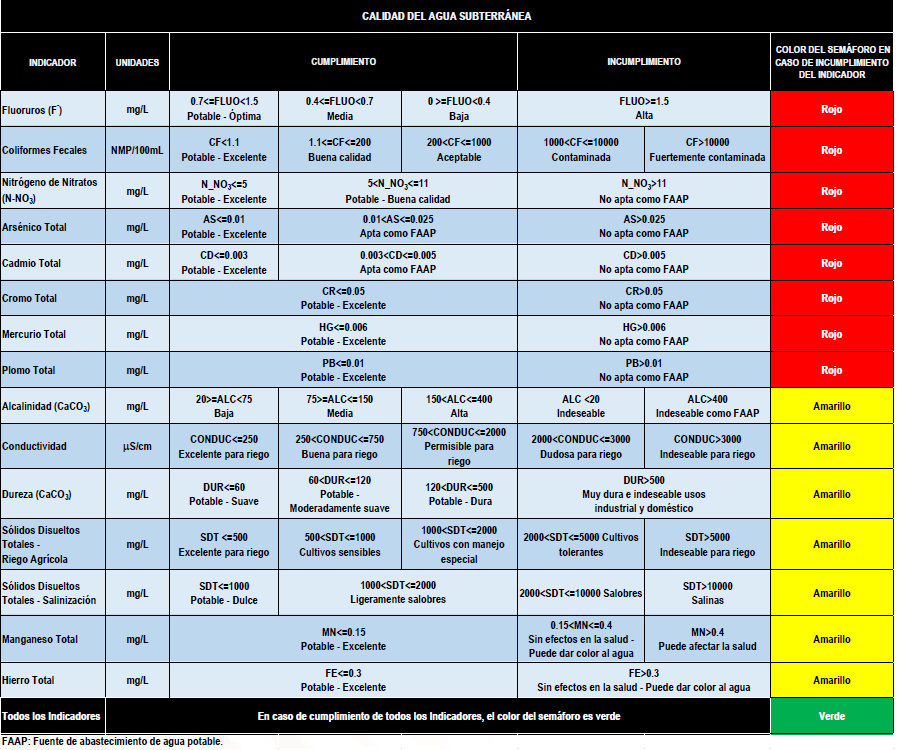

In [10]:
for i in col_num:
  print("___COLUMNA: " + i + '___')
  print("___VALORES ÚNICOS___") 
  print(df_agua_sub_num[i].value_counts())
  print("-"*10)

___COLUMNA: ALC_mg/L___
___VALORES ÚNICOS___
157.620    5
193.815    4
195.360    4
204.765    4
257.850    4
          ..
341.000    1
151.000    1
106.000    1
99.000     1
256.000    1
Name: ALC_mg/L, Length: 816, dtype: int64
----------
___COLUMNA: CONDUCT_mS/cm___
___VALORES ÚNICOS___
777.0    6
300.0    4
412.0    4
454.0    4
308.0    4
        ..
826.0    1
876.0    1
373.0    1
733.0    1
817.0    1
Name: CONDUCT_mS/cm, Length: 801, dtype: int64
----------
___COLUMNA: SDT_mg/L___
___VALORES ÚNICOS___
Series([], Name: SDT_mg/L, dtype: int64)
----------
___COLUMNA: SDT_M_mg/L___
___VALORES ÚNICOS___
496         4
320         4
292         4
317         4
380         4
           ..
148         1
224         1
392         1
1736        1
690.6667    1
Name: SDT_M_mg/L, Length: 925, dtype: int64
----------
___COLUMNA: FLUORUROS_mg/L___
___VALORES ÚNICOS___
<0.2      162
0.466       3
0.5202      3
0.4993      2
0.482       2
         ... 
1.6185      1
0.6045      1
0.7042      1


In [11]:
df_agua_sub_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1064 non-null   float64
 1   CONDUCT_mS/cm        1062 non-null   float64
 2   SDT_mg/L             0 non-null      float64
 3   SDT_M_mg/L           1066 non-null   object 
 4   FLUORUROS_mg/L       1068 non-null   object 
 5   DUR_mg/L             1067 non-null   object 
 6   COLI_FEC_NMP/100_mL  1068 non-null   object 
 7   N_NO3_mg/L           1067 non-null   object 
 8   AS_TOT_mg/L          1068 non-null   object 
 9   CD_TOT_mg/L          1068 non-null   object 
 10  CR_TOT_mg/L          1068 non-null   object 
 11  HG_TOT_mg/L          1068 non-null   object 
 12  PB_TOT_mg/L          1068 non-null   object 
 13  MN_TOT_mg/L          1068 non-null   object 
 14  FE_TOT_mg/L          1068 non-null   object 
dtypes: float64(3), object(12)
memory usage

In [12]:
df_agua_sub_num['SDT_M_mg/L'].dtype

dtype('O')

Aquí podemos observar que los tipos de variables son representados como objetos al utilizar el método *info()* del DataFrame. Sin embargo, al analizar los valores de cada columna por separado, notamos que en su mayoría se encuentran datos de tipo entero y flotante, exceptuando algunos Strings que son representados con el símbolo '<'. *Debemos de considerar aplicar un cambio a estos valores*

### Cambios al Dataset

In [13]:
#Aquí convertimos nuestros datos de tipo objeto hacia flotante, reemplazando los valores a mano

for name in col_num:
  df_agua_sub_num.loc[:,name] = df_agua_sub_num.loc[:,name].astype('str')
  df_agua_sub_num.loc[:,name] = df_agua_sub_num.loc[:,name].str.replace('<25','25') 
  df_agua_sub_num.loc[:,name] = df_agua_sub_num.loc[:,name].str.replace('<0.2','0.2') 
  df_agua_sub_num.loc[:,name] = df_agua_sub_num.loc[:,name].str.replace('<20','20') 
  df_agua_sub_num.loc[:,name] = df_agua_sub_num.loc[:,name].str.replace('<1.1','1.1')
  df_agua_sub_num.loc[:,name] = df_agua_sub_num.loc[:,name].str.replace('<0.02','0.02') 
  df_agua_sub_num.loc[:,name] = df_agua_sub_num.loc[:,name].str.replace('<0.01','0.01') 
  df_agua_sub_num.loc[:,name] = df_agua_sub_num.loc[:,name].str.replace('<0.003','0.003')
  df_agua_sub_num.loc[:,name] = df_agua_sub_num.loc[:,name].str.replace('<0.005','0.004') 
  df_agua_sub_num.loc[:,name] = df_agua_sub_num.loc[:,name].str.replace('<0.0005','0.0004') 
  df_agua_sub_num.loc[:,name] = df_agua_sub_num.loc[:,name].str.replace('<0.0015','0.0015') 
  df_agua_sub_num.loc[:,name] = df_agua_sub_num.loc[:,name].str.replace('<0.025','0.025')  
  df_agua_sub_num.loc[:,name] = df_agua_sub_num.loc[:,name].astype('float')

df_agua_sub_num.info()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1064 non-null   float64
 1   CONDUCT_mS/cm        1062 non-null   float64
 2   SDT_mg/L             0 non-null      float64
 3   SDT_M_mg/L           1066 non-null   float64
 4   FLUORUROS_mg/L       1068 non-null   float64
 5   DUR_mg/L             1067 non-null   float64
 6   COLI_FEC_NMP/100_mL  1068 non-null   float64
 7   N_NO3_mg/L           1067 non-null   float64
 8   AS_TOT_mg/L          1068 non-null   float64
 9   CD_TOT_mg/L          1068 non-null   float64
 10  CR_TOT_mg/L          1068 non-null   float64
 11  HG_TOT_mg/L          1068 non-null   float64
 12  PB_TOT_mg/L          1068 non-null   float64
 13  MN_TOT_mg/L          1068 non-null   float64
 14  FE_TOT_mg/L          1068 non-null   float64
dtypes: float64(15)
memory usage: 125.3 KB


Como se había analizado anteriormente removeremos la variable **SDT_mg/L** debido a que sólo contiene valores nulos.

In [14]:
df_agua_sub_num.drop('SDT_mg/L', axis=1, inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Proseguiremos a imputar los valores de las variables con valores nulos que nos restan del DataSet. Para eso veamos la distribución de los datos a través de histogramas.

**Histogramas**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f707e95afd0>,
      dtype=object)

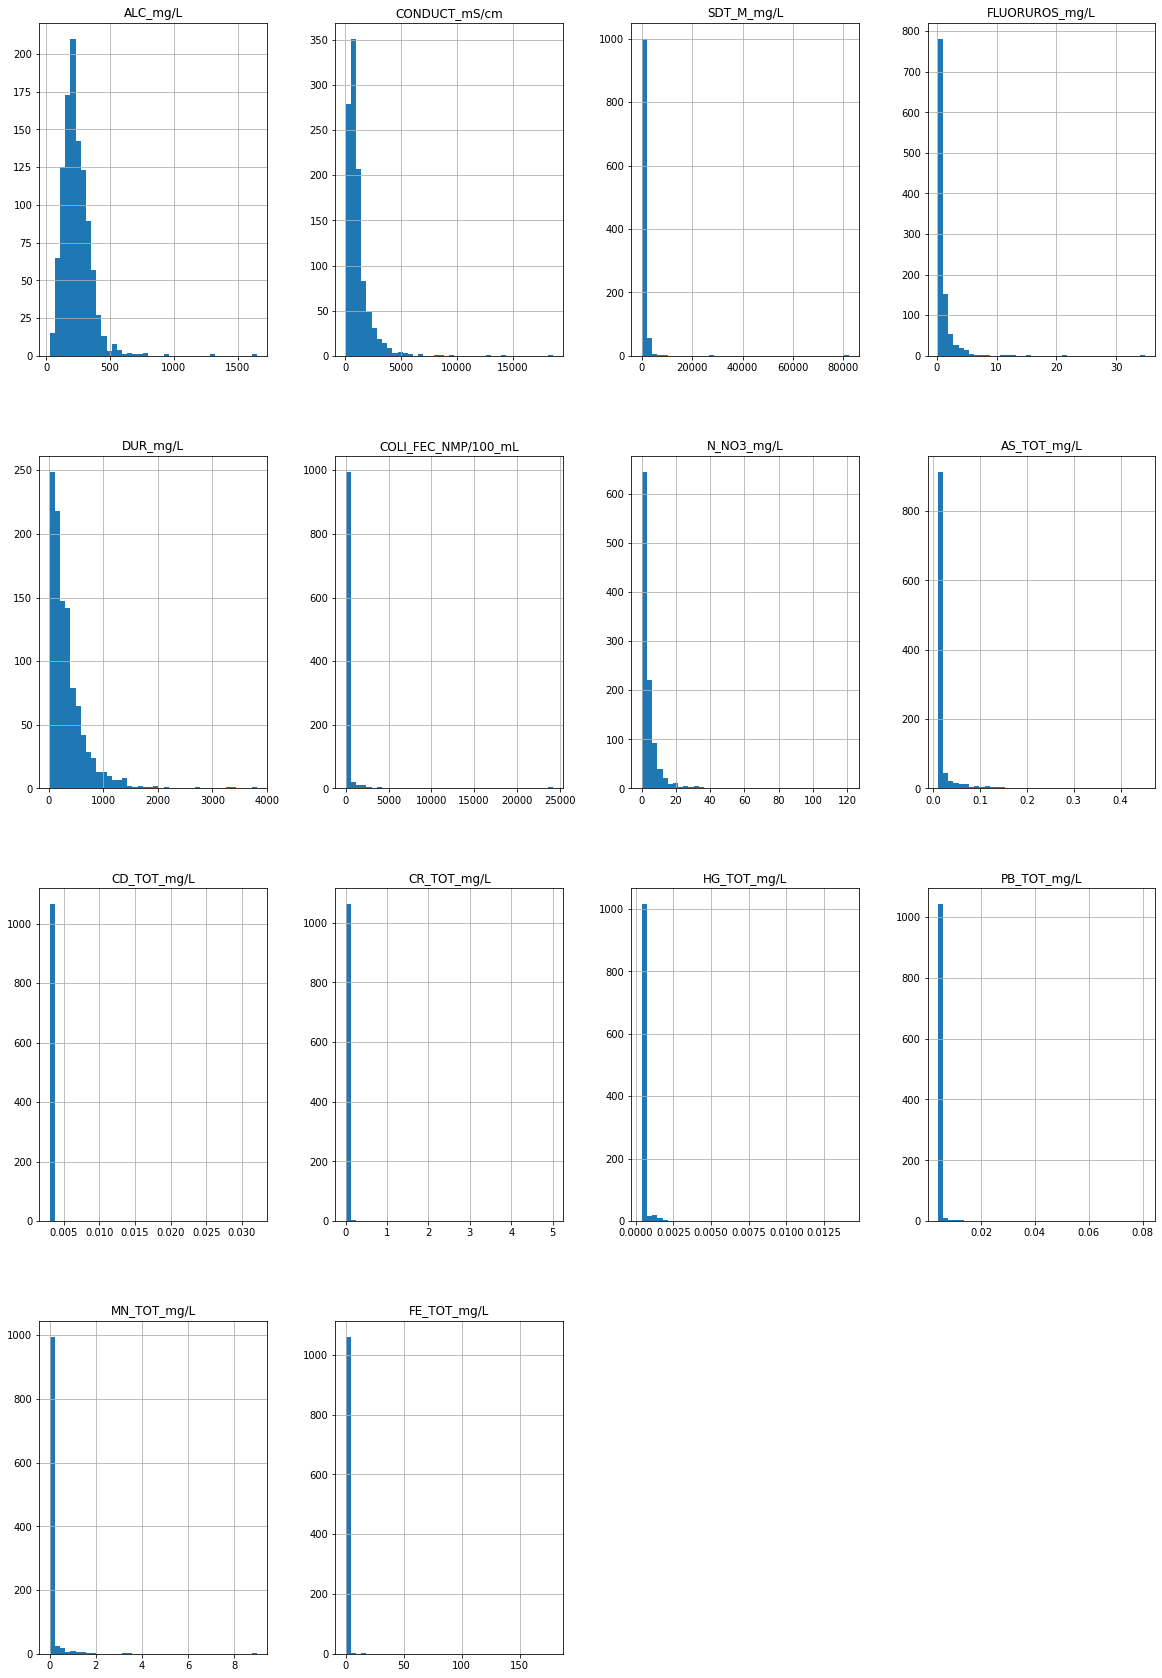

In [15]:
#Impresión de gráficos
df_agua_sub_num.hist(bins = 40, figsize=(20,30))
#La función se llama en cada serie en el DataFrame, lo que da como resultado un histograma por columna. 
#La función hist () se utiliza para crear un histograma, que aclara la idea de la distribución de ciertas 
#variables numéricas del conjunto de datos.

In [16]:
df_agua_sub_num.isnull().sum().sort_values(ascending = False)

CONDUCT_mS/cm          6
ALC_mg/L               4
SDT_M_mg/L             2
DUR_mg/L               1
N_NO3_mg/L             1
FLUORUROS_mg/L         0
COLI_FEC_NMP/100_mL    0
AS_TOT_mg/L            0
CD_TOT_mg/L            0
CR_TOT_mg/L            0
HG_TOT_mg/L            0
PB_TOT_mg/L            0
MN_TOT_mg/L            0
FE_TOT_mg/L            0
dtype: int64

In [17]:
#class sklearn.impute.SimpleImputer(*, missing_values=nan, strategy='mean', fill_value=None, verbose='deprecated', copy=True, add_indicator=False)[source]

col_num= ['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L'] #sin ,'SDT_mg/L'


for name in col_num:
  mediana = df_agua_sub_num[name].median() 
  df_agua_sub_num[name]= df_agua_sub_num[name].replace(np.nan, mediana)

df_agua_sub_num.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1068 non-null   float64
 1   CONDUCT_mS/cm        1068 non-null   float64
 2   SDT_M_mg/L           1068 non-null   float64
 3   FLUORUROS_mg/L       1068 non-null   float64
 4   DUR_mg/L             1068 non-null   float64
 5   COLI_FEC_NMP/100_mL  1068 non-null   float64
 6   N_NO3_mg/L           1068 non-null   float64
 7   AS_TOT_mg/L          1068 non-null   float64
 8   CD_TOT_mg/L          1068 non-null   float64
 9   CR_TOT_mg/L          1068 non-null   float64
 10  HG_TOT_mg/L          1068 non-null   float64
 11  PB_TOT_mg/L          1068 non-null   float64
 12  MN_TOT_mg/L          1068 non-null   float64
 13  FE_TOT_mg/L          1068 non-null   float64
dtypes: float64(14)
memory usage: 116.9 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [18]:
df_agua_sub_num.describe().T

count         mean          std      min         25%  \
ALC_mg/L             1068.0   235.558455   116.661485  26.6400  164.048750   
CONDUCT_mS/cm        1068.0  1137.133052  1242.292889  50.4000  505.500000   
SDT_M_mg/L           1068.0   895.454185  2748.991295  25.0000  337.700000   
FLUORUROS_mg/L       1068.0     1.075600     1.924278   0.2000    0.267175   
DUR_mg/L             1068.0   347.842003   359.514579  20.0000  121.274100   
COLI_FEC_NMP/100_mL  1068.0   355.490356  2052.457014   1.1000    1.100000   
N_NO3_mg/L           1068.0     4.317663     8.341504   0.0200    0.650932   
AS_TOT_mg/L          1068.0     0.019618     0.035209   0.0100    0.010000   
CD_TOT_mg/L          1068.0     0.003030     0.000894   0.0030    0.003000   
CR_TOT_mg/L          1068.0     0.012476     0.154435   0.0040    0.004000   
HG_TOT_mg/L          1068.0     0.000467     0.000479   0.0004    0.000400   
PB_TOT_mg/L          1068.0     0.004310     0.003342   0.0040    0.004000   
MN_TOT_mg/L          1068.0     0.072478     0.376512   0.0015    0.001500   
FE_TOT_mg/L          1068.0     0.410387     5.537974   0.0250    0.025000   

                            50%          75%           max  
ALC_mg/L             215.527500   292.423750   1650.000000  
CONDUCT_mS/cm        815.000000  1321.250000  18577.000000  
SDT_M_mg/L           550.400000   915.900000  82170.000000  
FLUORUROS_mg/L         0.503500     1.139850     34.803300  
DUR_mg/L             245.335800   453.930000   3810.692200  
COLI_FEC_NMP/100_mL    1.100000    13.250000  24196.000000  
N_NO3_mg/L             2.080932     5.200047    121.007813  
AS_TOT_mg/L            0.010000     0.010000      0.452200  
CD_TOT_mg/L            0.003000     0.003000      0.032110  
CR_TOT_mg/L            0.004000     0.004000      5.003200  
HG_TOT_mg/L            0.000400     0.000400      0.014150  
PB_TOT_mg/L            0.004000     0.004000      0.080900  
MN_TOT_mg/L            0.001500     0.009947      8.982000  
FE_TOT_mg/L            0.046960     0.173380    178.615000

Analizando las variables uno vez limpios e imputados los datos del Dataset, encontramos lo siguiente:

* Encontramos que hay valores con mínimos y máximos muy separados como lo son: ALC_mg/L, CONDUCT_mS/cm, SDT_M_mg/L, DUR_mg/L y COLI_FEC_NMP/100_mL --> *Revisar Outliers*

### Outliers

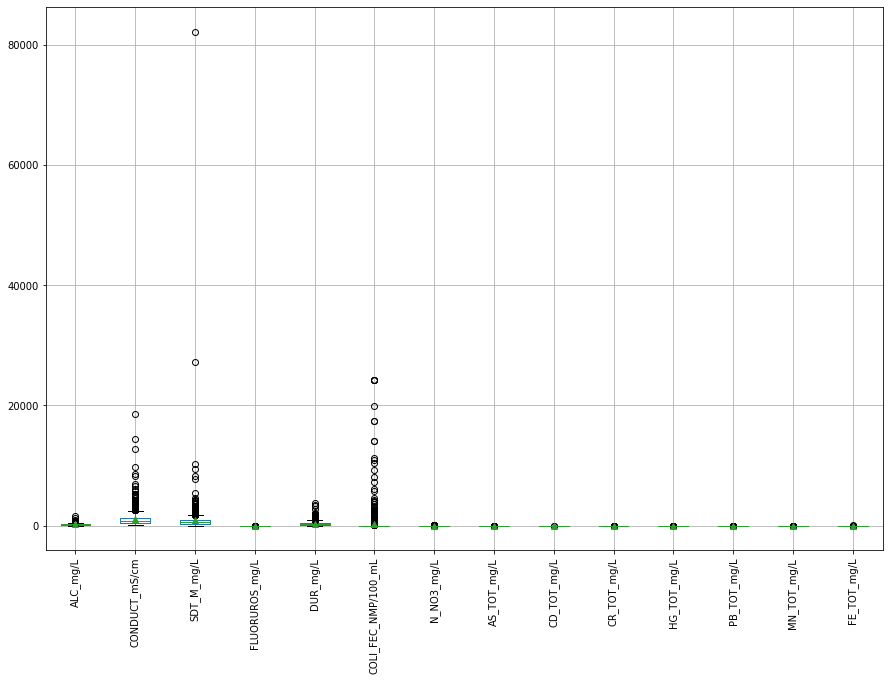

In [19]:
outliers = df_agua_sub_num.boxplot(figsize = (15,10),showmeans = True)
outliers.plot()
plt.xticks(rotation=90)
#plt.ylim(0, 4)
plt.show()

Decidimos eliminar dos de los registros que presentaban outliers muy lejanos para nuestra variable **SDT_M_mg/L**, debido a que se encuentran muy fuera del rango normal establecido por la tabla de determinación de calidad, además de no estar nada cercano a los demás valores de la variable.

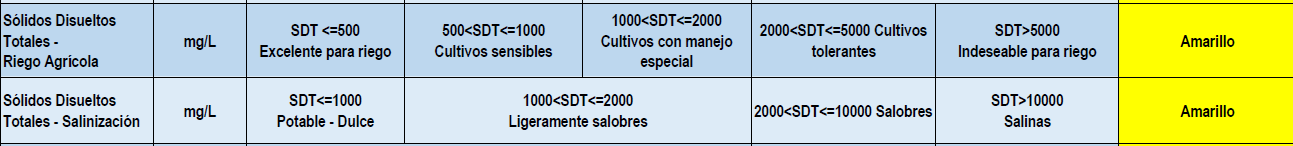

In [20]:
df_agua_sub_num.loc[df_agua_sub_num['SDT_M_mg/L'] > 25000]


ALC_mg/L  CONDUCT_mS/cm  SDT_M_mg/L  FLUORUROS_mg/L   DUR_mg/L  \
37     208.68         2860.0     27215.8          0.3848   672.4172   
740    304.00         2704.0     82170.0          0.5169  1339.0000   

     COLI_FEC_NMP/100_mL  N_NO3_mg/L  AS_TOT_mg/L  CD_TOT_mg/L  CR_TOT_mg/L  \
37                  63.0    5.869769         0.01        0.003      0.00710   
740                  9.0    1.955000         0.01        0.003      0.00652   

     HG_TOT_mg/L  PB_TOT_mg/L  MN_TOT_mg/L  FE_TOT_mg/L  
37        0.0004        0.004      0.00800      0.49690  
740       0.0005        0.005      0.00696      0.09777

In [21]:
#Revisar si es factible eliminar outliers
df_agua_sub_num.drop([740],axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [22]:
#Revisar si es factible eliminar outliers
df_agua_sub_num.drop([37],axis=0, inplace=True)

### Salida

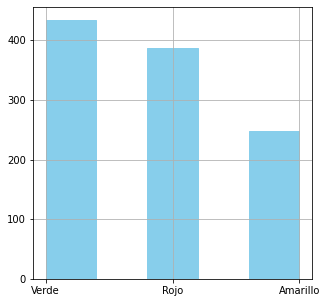

In [23]:
#Semáforo de calidad del agua {Verde:  }
y = pd.DataFrame(df_agua_sub['SEMAFORO'])
y['SEMAFORO'].hist(bins = 5, histtype ='barstacked', color = "skyblue", ec="skyblue", figsize=(5,5))

Porcentaje de las salidas

In [24]:
y.value_counts()
print('Verde: '     +  str(434/y.value_counts().sum() * 100) + '%')
print('Rojo: '      +  str(387/y.value_counts().sum() * 100) + '%')
print('Amarillo: ' +  str(247/y.value_counts().sum() * 100) + '%')

Verde: 40.63670411985019%
Rojo: 36.235955056179776%
Amarillo: 23.127340823970037%


### Correlación de Variables Independientes

In [25]:
df_agua_sub_num.columns

Index(['ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L',
       'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L',
       'CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L',
       'FE_TOT_mg/L'],
      dtype='object')

In [26]:
#Vemos la matriz de correlacion
df_agua_sub_num.corr()

ALC_mg/L  CONDUCT_mS/cm  SDT_M_mg/L  FLUORUROS_mg/L  \
ALC_mg/L             1.000000       0.217216    0.213802        0.068962   
CONDUCT_mS/cm        0.217216       1.000000    0.782028       -0.024302   
SDT_M_mg/L           0.213802       0.782028    1.000000       -0.007915   
FLUORUROS_mg/L       0.068962      -0.024302   -0.007915        1.000000   
DUR_mg/L             0.243089       0.692092    0.862077       -0.149098   
COLI_FEC_NMP/100_mL -0.016279       0.018438    0.015909        0.003470   
N_NO3_mg/L          -0.000150       0.220349    0.352206       -0.019689   
AS_TOT_mg/L          0.073568      -0.004375   -0.000171        0.443988   
CD_TOT_mg/L          0.032723       0.029214    0.039330       -0.015144   
CR_TOT_mg/L         -0.014223       0.004534    0.002910       -0.005228   
HG_TOT_mg/L          0.069724       0.057201    0.064294       -0.028629   
PB_TOT_mg/L          0.016859       0.024733   -0.007781       -0.034170   
MN_TOT_mg/L          0.130029       0.096532    0.082840       -0.049853   
FE_TOT_mg/L          0.043497       0.083357    0.070398       -0.010005   

                     DUR_mg/L  COLI_FEC_NMP/100_mL  N_NO3_mg/L  AS_TOT_mg/L  \
ALC_mg/L             0.243089            -0.016279   -0.000150     0.073568   
CONDUCT_mS/cm        0.692092             0.018438    0.220349    -0.004375   
SDT_M_mg/L           0.862077             0.015909    0.352206    -0.000171   
FLUORUROS_mg/L      -0.149098             0.003470   -0.019689     0.443988   
DUR_mg/L             1.000000             0.032459    0.303373    -0.105905   
COLI_FEC_NMP/100_mL  0.032459             1.000000   -0.000946     0.038074   
N_NO3_mg/L           0.303373            -0.000946    1.000000    -0.007975   
AS_TOT_mg/L         -0.105905             0.038074   -0.007975     1.000000   
CD_TOT_mg/L          0.025224            -0.001666   -0.009357    -0.009096   
CR_TOT_mg/L          0.007476            -0.008949   -0.015162    -0.009718   
HG_TOT_mg/L          0.065195            -0.008911    0.011411    -0.012612   
PB_TOT_mg/L         -0.017831             0.021473   -0.017248    -0.023581   
MN_TOT_mg/L          0.084802            -0.005377   -0.036830     0.016829   
FE_TOT_mg/L          0.060160             0.003039    0.013290     0.014285   

                     CD_TOT_mg/L  CR_TOT_mg/L  HG_TOT_mg/L  PB_TOT_mg/L  \
ALC_mg/L                0.032723    -0.014223     0.069724     0.016859   
CONDUCT_mS/cm           0.029214     0.004534     0.057201     0.024733   
SDT_M_mg/L              0.039330     0.002910     0.064294    -0.007781   
FLUORUROS_mg/L         -0.015144    -0.005228    -0.028629    -0.034170   
DUR_mg/L                0.025224     0.007476     0.065195    -0.017831   
COLI_FEC_NMP/100_mL    -0.001666    -0.008949    -0.008911     0.021473   
N_NO3_mg/L             -0.009357    -0.015162     0.011411    -0.017248   
AS_TOT_mg/L            -0.009096    -0.009718    -0.012612    -0.023581   
CD_TOT_mg/L             1.000000    -0.001826    -0.004633    -0.003076   
CR_TOT_mg/L            -0.001826     1.000000     0.006996    -0.001144   
HG_TOT_mg/L            -0.004633     0.006996     1.000000     0.021849   
PB_TOT_mg/L            -0.003076    -0.001144     0.021849     1.000000   
MN_TOT_mg/L            -0.004215    -0.005124     0.631792    -0.011292   
FE_TOT_mg/L            -0.001038     0.000608     0.862561     0.003010   

                     MN_TOT_mg/L  FE_TOT_mg/L  
ALC_mg/L                0.130029     0.043497  
CONDUCT_mS/cm           0.096532     0.083357  
SDT_M_mg/L              0.082840     0.070398  
FLUORUROS_mg/L         -0.049853    -0.010005  
DUR_mg/L                0.084802     0.060160  
COLI_FEC_NMP/100_mL    -0.005377     0.003039  
N_NO3_mg/L             -0.036830     0.013290  
AS_TOT_mg/L             0.016829     0.014285  
CD_TOT_mg/L            -0.004215    -0.001038  
CR_TOT_mg/L            -0.005124     0.000608  
HG_TOT_mg/L             0.631792     0.8

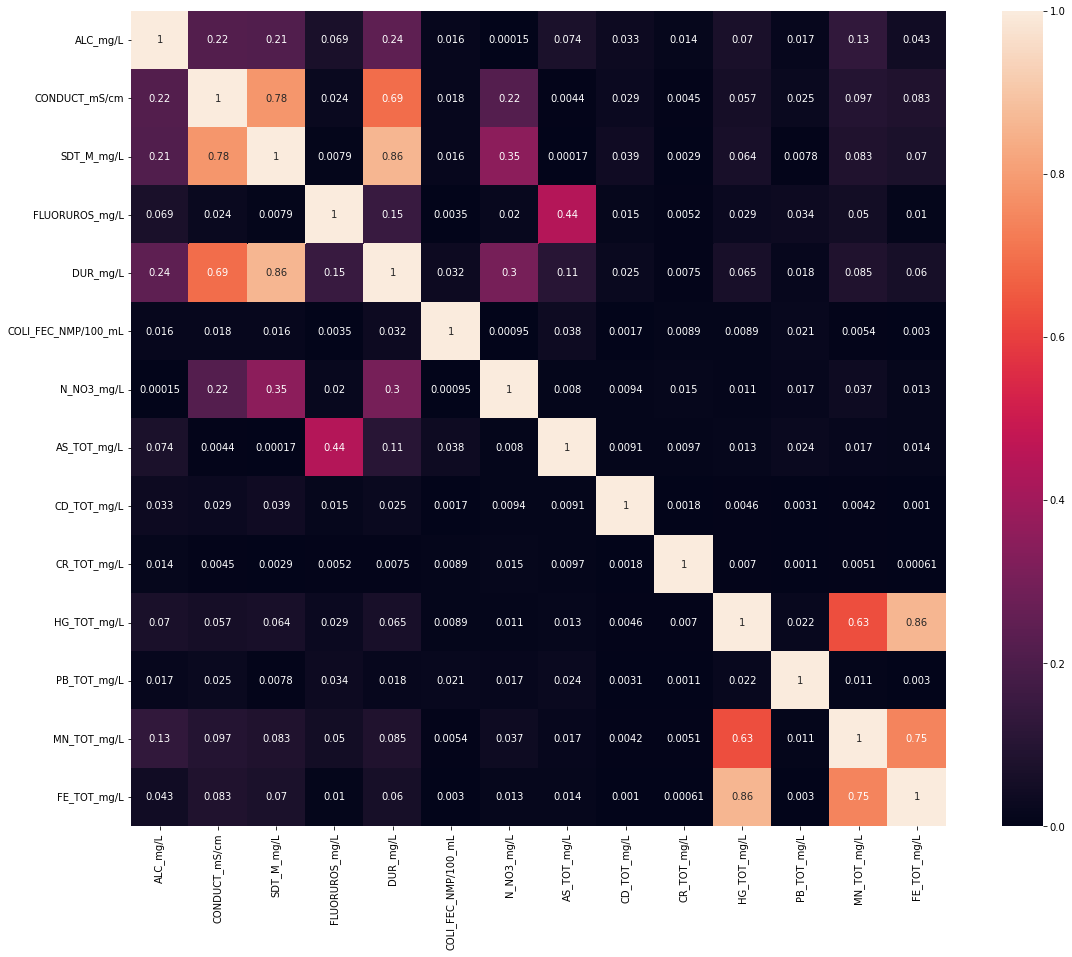

In [27]:
correlacion = df_agua_sub_num.corr().abs() #El abs nos permite analizar la correlación sin importar que sea directa o indirecta

f, ax = plt.subplots(figsize = (20,15)) #Definir el área de trabajo.

sns.heatmap(correlacion, vmax = 1, vmin = 0, square = True, annot = True)


De la correlación entre variables independientes encontramos lo siguiente:
* **FE_TOT_mg/L** tiene una alta correlación con **HG_TOT_mg/L (0.86)** y con **MN_TOT_mg/L (0.75)**. --> Por lo que en algún momento podríamos utilizar solo 1 de las tres variables en nuestro modelo.

* **DUR_mg/L** tiene una alta correlación con **SDT_M_mg/L (0.86)** y con **COLI_FEC_NMP/100_mL (0.69)**

* **COLI_FEC_NMP/100_mL** tiene alta correlación con **SDT_M_mg/L (0.78)**

### Correlación con Variable Dependiente

In [28]:
df_dep = pd.DataFrame(columns = df_agua_sub_num.columns)
df_dep = df_agua_sub_num.copy()
#df_dep['SEMAFORO'] = y['SEMAFORO']
df_dep

ALC_mg/L  CONDUCT_mS/cm  SDT_M_mg/L  FLUORUROS_mg/L  DUR_mg/L  \
0      229.990          940.0    603.6000          0.9766  213.7320   
1      231.990          608.0    445.4000          0.9298  185.0514   
2      204.920          532.0    342.0000          1.8045  120.7190   
3      327.000          686.0    478.6000          1.1229  199.8790   
4      309.885         1841.0   1179.0000          0.2343  476.9872   
...        ...            ...         ...             ...       ...   
1063   231.045         2350.0   1545.8000          0.2000  752.0960   
1064   256.000          529.0    297.0000          0.2000  273.0000   
1065   330.690         2600.0   1873.0000          0.7574  660.2126   
1066   193.140          873.0    690.6667          0.7108  406.3680   
1067   263.070          817.0    495.0000          0.4002  362.5440   

      COLI_FEC_NMP/100_mL  N_NO3_mg/L  AS_TOT_mg/L  CD_TOT_mg/L  CR_TOT_mg/L  \
0                     1.1    4.184656       0.0161        0.003        0.004   
1                     1.1    5.750110       0.0134        0.003        0.004   
2                     1.1    1.449803       0.0370        0.003        0.004   
3                     1.1    1.258597       0.0154        0.003        0.005   
4                   291.0   15.672251       0.0100        0.003        0.004   
...                   ...         ...          ...          ...          ...   
1063                  1.1   14.615488       0.0100        0.003        0.004   
1064                  1.1   77.392000       0.0100        0.003        0.004   
1065                620.0   36.477104       0.0100        0.003        0.004   
1066                  1.1    0.020000       0.0100        0.003        0.004   
1067                  1.1    0.811876       0.0100        0.003        0.004   

      HG_TOT_mg/L  PB_TOT_mg/L  MN_TOT_mg/L  FE_TOT_mg/L  
0          0.0004        0.004      0.00150      0.08910  
1          0.0004        0.004      0.00150      0.02500  
2          0.0004        0.004      0.00150      0.02500  
3          0.0004        0.004      0.00150      0.02500  
4          0.0004        0.004      0.00150      0.02500  
...           ...          ...          ...          ...  
1063       0.0004        0.004      0.00150      0.02500  
1064       0.0004        0.004      0.00709      0.07578  
1065       0.0004        0.004      0.02420      0.21290  
1066       0.0004        0.004      0.01200      0.17860  
1067       0.0004        0.004      0.00150      0.02500  

[1066 rows x 14 columns]

In [29]:
df_dummies = pd.get_dummies(y['SEMAFORO'])
df_dummies

Amarillo  Rojo  Verde
0            0     0      1
1            0     0      1
2            0     1      0
3            0     0      1
4            0     1      0
...        ...   ...    ...
1063         0     1      0
1064         0     1      0
1065         0     1      0
1066         0     0      1
1067         0     0      1

[1068 rows x 3 columns]

In [30]:
df_dep = pd.concat([df_dep, df_dummies], axis=1)

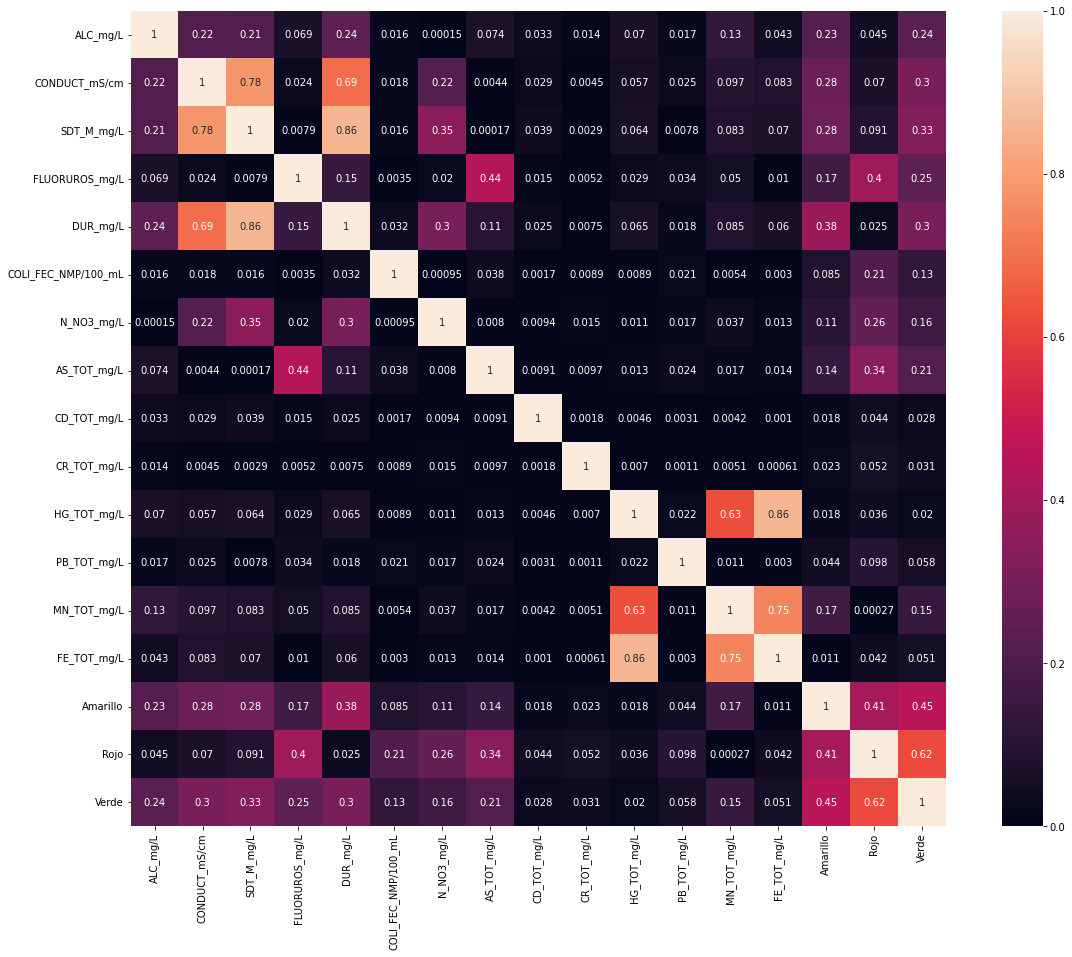

In [31]:
var_dep_corr = df_dep.corr().abs()

f, ax = plt.subplots(figsize = (20,15)) #Definir el área de trabajo.

sns.heatmap(var_dep_corr, vmax = 1, vmin = 0, square = True, annot = True)

Las variables dependientes que más impacto tienen con las variables independientes son:

**'ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L','COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L' y  MN_TOT_mg/L**

Debemos de considerarlas al momento de seleccionar las variables de nuestor modelo

### Preparación de los datos

**Análisis de Componentes Principales (PCA)**

In [32]:
scaler = StandardScaler() #Definimos variable scaler que almacena el método StandardScaler().
scaled_agua = scaler.fit_transform(df_agua_sub_num) #scaled va a almacenar los valor

scaled_df_agua = pd.DataFrame(scaled_agua, columns=df_agua_sub_num.columns)

Veamos la distribución de nuestros datos una vez escalados 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7078f8b310>,
      dtype=object)

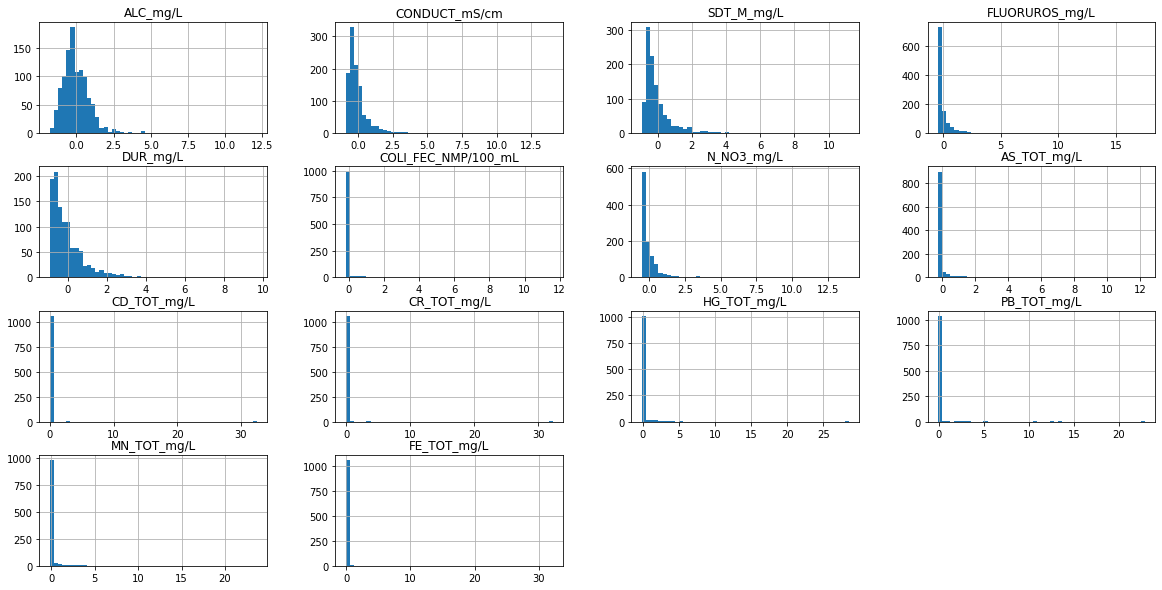

In [33]:
#Impresión de gráficos
scaled_df_agua.hist(bins = 50, figsize=(20,10))

In [34]:
from sklearn.decomposition import PCA
pcs_agua_sub = PCA() #Creamos variable pcs que almacena el método PCA().

pcs_agua = pcs_agua_sub.fit_transform(scaled_df_agua) ##variable pcs_agua_sub almacena los valores ajustados de la transformación de pcs a nuestro DataFrame Escalado

In [35]:
scaled_df_agua

ALC_mg/L  CONDUCT_mS/cm  SDT_M_mg/L  FLUORUROS_mg/L  DUR_mg/L  \
0    -0.047384      -0.156386   -0.226996       -0.052038 -0.370892   
1    -0.030245      -0.423950   -0.415089       -0.076349 -0.450947   
2    -0.262219      -0.485200   -0.538027        0.378043 -0.630517   
3     0.783932      -0.361089   -0.375615        0.023963 -0.409560   
4     0.637267       0.569745    0.457128       -0.437650  0.363924   
...        ...            ...         ...             ...       ...   
1061 -0.038343       0.979957    0.893236       -0.455469  1.131828   
1062  0.175506      -0.487617   -0.591529       -0.455469 -0.205459   
1063  0.815553       1.181436    1.282262       -0.165908  0.875356   
1064 -0.363166      -0.210382   -0.123478       -0.190116  0.166807   
1065  0.236091      -0.255513   -0.356117       -0.351468  0.044482   

      COLI_FEC_NMP/100_mL  N_NO3_mg/L  AS_TOT_mg/L  CD_TOT_mg/L  CR_TOT_mg/L  \
0               -0.172881   -0.016030    -0.100389     -0.03325    -0.054926   
1               -0.172881    0.171563    -0.177042     -0.03325    -0.054926   
2               -0.172881   -0.343755     0.492967     -0.03325    -0.054926   
3               -0.172881   -0.366667    -0.120262     -0.03325    -0.048454   
4               -0.031699    1.360560    -0.273569     -0.03325    -0.054926   
...                   ...         ...          ...          ...          ...   
1061            -0.172881    1.233925    -0.273569     -0.03325    -0.054926   
1062            -0.172881    8.756606    -0.273569     -0.03325    -0.054926   
1063             0.128525    3.853662    -0.273569     -0.03325    -0.054926   
1064            -0.172881   -0.515092    -0.273569     -0.03325    -0.054926   
1065            -0.172881   -0.420199    -0.273569     -0.03325    -0.054926   

      HG_TOT_mg/L  PB_TOT_mg/L  MN_TOT_mg/L  FE_TOT_mg/L  
0        -0.13935    -0.092522    -0.188755    -0.058027  
1        -0.13935    -0.092522    -0.188755    -0.069596  
2        -0.13935    -0.092522    -0.188755    -0.069596  
3        -0.13935    -0.092522    -0.188755    -0.069596  
4        -0.13935    -0.092522    -0.188755    -0.069596  
...           ...          ...          ...          ...  
1061     -0.13935    -0.092522    -0.188755    -0.069596  
1062     -0.13935    -0.092522    -0.173915    -0.060431  
1063     -0.13935    -0.092522    -0.128491    -0.035682  
1064     -0.13935    -0.092522    -0.160880    -0.041873  
1065     -0.13935    -0.092522    -0.188755    -0.069596  

[1066 rows x 14 columns]

Crearemos una variable con las etiquetas de cada Componente Principal (PC)

In [36]:
pcs_labels = [f'PC{i + 1}' for i in range(len(scaled_df_agua.columns))] 
pcs_labels

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14']

Crearemos una variable que almacenará el DataFrame con nuestros componentes en relación de la Desviación estándar, Proporción de varianza y Proporción Acumulada

In [37]:
pcsSummary_df_agua = pd.DataFrame({'Desviación estándar': np.sqrt(pcs_agua_sub.explained_variance_),
                             'Proporción de varianza': pcs_agua_sub.explained_variance_ratio_,
                             'Proporción Acumulada': np.cumsum(pcs_agua_sub.explained_variance_ratio_)
                             })

pcsSummary_df_agua = pcsSummary_df_agua.T
pcsSummary_df_agua.columns = pcs_labels
pcsSummary_df_agua.round(4)

PC1     PC2     PC3     PC4     PC5     PC6  \
Desviación estándar     1.7123  1.5425  1.2181  1.0189  1.0131  1.0013   
Proporción de varianza  0.2092  0.1698  0.1059  0.0741  0.0732  0.0715   
Proporción Acumulada    0.2092  0.3790  0.4849  0.5590  0.6322  0.7038   

                           PC7     PC8     PC9    PC10    PC11    PC12  \
Desviación estándar     0.9940  0.9711  0.8743  0.7477  0.6096  0.5490   
Proporción de varianza  0.0705  0.0673  0.0546  0.0399  0.0265  0.0215   
Proporción Acumulada    0.7743  0.8416  0.8961  0.9360  0.9625  0.9840   

                          PC13    PC14  
Desviación estándar     0.3395  0.3295  
Proporción de varianza  0.0082  0.0077  
Proporción Acumulada    0.9923  1.0000

Si analizamos este % de varianza en los componentes principales,ahora vemos cómo tiene un mayor impacto los componentes yendo del primer componente con más % de varianza, hasta llegar a 100%


In [38]:
pcsSummary_df_agua = pd.DataFrame({'% varianza explicada': np.round(pcs_agua_sub.explained_variance_ratio_,4) * 100,
                                    '% varianza acumulada': np.cumsum(pcs_agua_sub.explained_variance_ratio_) * 100},
                                    index = pcs_labels)
pcsSummary_df_agua

% varianza explicada  % varianza acumulada
PC1                  20.92             20.922778
PC2                  16.98             37.901380
PC3                  10.59             48.489662
PC4                   7.41             55.898031
PC5                   7.32             63.222037
PC6                   7.15             70.376173
PC7                   7.05             77.426697
PC8                   6.73             84.155882
PC9                   5.46             89.611066
PC10                  3.99             93.600483
PC11                  2.65             96.252258
PC12                  2.15             98.402939
PC13                  0.82             99.225276
PC14                  0.77            100.000000

* Con 7 componentes ya cumplimos con el **77.42%** de varianza acumulada.
* Con 8 componentes cumplimos con el **84.15%** de varianza acumulada.

>Por lo tanto, sólo necesitamos de 6 a 8 componentes para alimentar nuestro modelo.

In [39]:
pcsComponents_df_agua = pd.DataFrame(pcs_agua_sub.components_.round(4),#datos pcs.components nos da los pesos de cada uno de los componentes
                                columns=pcs_labels,#columnas Son 14 columnas, las cuales hacen referencia a cada uno de los componentes: PC1, PC2...PC10
                                index=scaled_df_agua.columns #índice (ID) Las filas son 10 también, las cuales hacen referencia a las variables originales
                                )
pcsComponents_df_agua

PC1     PC2     PC3     PC4     PC5     PC6     PC7  \
ALC_mg/L             0.1976  0.4530  0.4908 -0.0600  0.4779  0.0123  0.2154   
CONDUCT_mS/cm       -0.0398 -0.2416 -0.2777  0.0141 -0.2689 -0.0151 -0.1725   
SDT_M_mg/L           0.2163  0.0574  0.0604  0.6829 -0.0629  0.0494 -0.0055   
FLUORUROS_mg/L       0.4953  0.0497 -0.0385 -0.0592 -0.0014  0.0161 -0.4483   
DUR_mg/L            -0.1551  0.0174  0.0022 -0.0151 -0.0009  0.7324  0.0701   
COLI_FEC_NMP/100_mL  0.0010  0.0396  0.0128  0.0320  0.0112 -0.0024 -0.0879   
N_NO3_mg/L          -0.2198 -0.0215  0.0111 -0.0156  0.0095  0.5821  0.0432   
AS_TOT_mg/L         -0.4573 -0.0310  0.0310  0.1187 -0.0669 -0.3238  0.4739   
CD_TOT_mg/L          0.6113 -0.2936 -0.1725 -0.0851 -0.1183  0.1148  0.6785   
CR_TOT_mg/L         -0.0162 -0.0182 -0.0298 -0.6907  0.0267 -0.0557  0.0095   
HG_TOT_mg/L         -0.0724  0.0684 -0.0245  0.1035 -0.0846  0.0057  0.0934   
PB_TOT_mg/L          0.0558  0.7650 -0.2222 -0.0888 -0.5690  0.0156  0.1067   
MN_TOT_mg/L         -0.0365  0.0055  0.1525  0.0010 -0.1588  0.0123  0.0058   
FE_TOT_mg/L         -0.0476  0.2257 -0.7561  0.0881  0.5655 -0.0123  0.0559   

                        PC8     PC9    PC10    PC11    PC12    PC13    PC14  
ALC_mg/L            -0.0316  0.0246  0.0011  0.2746  0.0027  0.2763  0.2880  
CONDUCT_mS/cm        0.0311 -0.0217  0.0004  0.5078  0.0067  0.4701  0.5293  
SDT_M_mg/L           0.6836 -0.0139 -0.0285 -0.0201 -0.0683  0.0011  0.0020  
FLUORUROS_mg/L      -0.0464  0.5475 -0.0416 -0.0437  0.4855  0.0234 -0.0650  
DUR_mg/L             0.0487 -0.3099 -0.2181  0.0178  0.5358 -0.0207  0.0204  
COLI_FEC_NMP/100_mL  0.0240 -0.2287  0.9322  0.0061  0.2592 -0.0142 -0.0069  
N_NO3_mg/L           0.0281  0.6076  0.2690  0.0097 -0.4080 -0.0001  0.0343  
AS_TOT_mg/L          0.1063  0.4254  0.0079  0.0707  0.4845 -0.0635  0.0694  
CD_TOT_mg/L         -0.0785  0.0130  0.0904  0.0214 -0.0100 -0.0074 -0.0208  
CR_TOT_mg/L          0.7031 -0.0056  0.0087 -0.0897 -0.0030  0.1127 -0.0473  
HG_TOT_mg/L         -0.1044  0.0090  0.0134 -0.5546  0.0348  0.7853 -0.1616  
PB_TOT_mg/L         -0.0307 -0.0030  0.0035  0.0201 -0.0512 -0.1057  0.0621  
MN_TOT_mg/L         -0.0013  0.0022 -0.0022  0.5724 -0.0101  0.2323 -0.7538  
FE_TOT_mg/L          0.0327  0.0148 -0.0030  0.1218  0.0032  0.0525 -0.1592

In [40]:
pcsComponents_df_agua.abs().idxmax() #Nos interesa buscar los máximos por filas, no por columnas. Por eso usamos idxmax
#Si quisieramos especidicar en una sola columna, llamaríamos el nombre del componente (PCA1)

PC1             CD_TOT_mg/L
PC2             PB_TOT_mg/L
PC3             FE_TOT_mg/L
PC4             CR_TOT_mg/L
PC5             PB_TOT_mg/L
PC6                DUR_mg/L
PC7             CD_TOT_mg/L
PC8             CR_TOT_mg/L
PC9              N_NO3_mg/L
PC10    COLI_FEC_NMP/100_mL
PC11            MN_TOT_mg/L
PC12               DUR_mg/L
PC13            HG_TOT_mg/L
PC14            MN_TOT_mg/L
dtype: object

In [41]:
pcsComponents_df_agua.abs().idxmax().value_counts()

CD_TOT_mg/L            2
PB_TOT_mg/L            2
CR_TOT_mg/L            2
DUR_mg/L               2
MN_TOT_mg/L            2
FE_TOT_mg/L            1
N_NO3_mg/L             1
COLI_FEC_NMP/100_mL    1
HG_TOT_mg/L            1
dtype: int64

Vemos la importancia de las variables por cada uno de los componentes. Las variables **CD_TOT_mg/L, PB_TOT_mg/L,CR_TOT_mg/L, DUR_mg/L y MN_TOT_mg/L**. Son las que más importancia tienen en el total de Componentes Principales.

De igual forma **FE_TOT_mg/L** se encuentra como principal opción para el *PC3*, debemos de tomarlo en cuenta al momento de alimentar nuestro modelo.

## **K means**

Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means. Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.

### Representación de Clusters en mapa de México

In [42]:
df_ubi = df_agua_sub[['LONGITUD','LATITUD']]

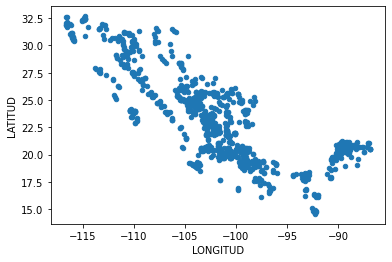

In [43]:
#Vamos a ver las coordenandas de nuetro data frame en el mapa geopandas

df_ubi.plot.scatter('LONGITUD','LATITUD')


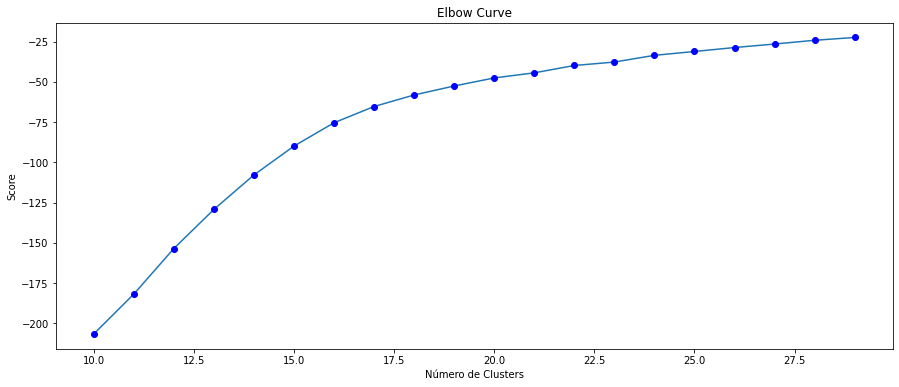

In [44]:
from sklearn.cluster import KMeans

#Definimos un rango de clusters grandes para ver el comportamiento
K_clusters = range(10,30)

#Evaluación individual de cada cluster
mi_kmeans = [KMeans(n_clusters=i) for i in K_clusters]

#Definimos los ejes
Y_axis = df_ubi[['LATITUD']]
X_axis = df_ubi[['LONGITUD']]

#Valores por cada uno de los k_means más cercanos
score = [mi_kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(mi_kmeans))]

#Graficamos los datos
plt.figure(figsize=(15,6))
plt.plot(K_clusters, score)
plt.plot(K_clusters, score, 'o', color="b")
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


In [45]:
#No tenemos columna de las coordenadas, tenemos que crearla para poder  meterlas al geopandas
df_ubi
df_ubi["COORDENADAS"] = list(zip(df_ubi.LONGITUD, df_ubi.LATITUD))
df_ubi["COORDENADAS"] = df_ubi["COORDENADAS"].apply(Point)
df_ubi.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


LONGITUD   LATITUD                  COORDENADAS
0 -102.02210  22.20887   POINT (-102.0221 22.20887)
1 -102.20075  21.99958  POINT (-102.20075 21.99958)
2 -102.28801  22.36685  POINT (-102.28801 22.36685)
3 -102.29449  22.18435  POINT (-102.29449 22.18435)
4 -110.24480  23.45138   POINT (-110.2448 23.45138)

In [46]:
X = df_agua_sub[['LONGITUD','LATITUD']]

#Utilizaré 16 clusters, viendo que es cuando la variabilidad de la pendiente disminuye bastante.

#Ajustamos los resultados
kmeans = KMeans(n_clusters=16).fit(X)
centroids = kmeans.cluster_centers_

#Ahora guardamos los resultados
labels = kmeans.predict(X)

#Obteniendo los centros de cada cluster
C = kmeans.cluster_centers_

C_DF = pd.DataFrame(C)
C_DF["Coordinates"] = list(zip(C_DF[0], C_DF[1]))
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point) 


gdf_C = gpd.GeoDataFrame(C_DF, geometry="Coordinates")
gdf_C



0          1                  Coordinates
0  -106.044505  24.800467  POINT (-106.04451 24.80047)
1   -89.188374  20.546897   POINT (-89.18837 20.54690)
2  -103.603893  19.996733  POINT (-103.60389 19.99673)
3  -111.146226  29.512684  POINT (-111.14623 29.51268)
4   -97.232530  17.815761   POINT (-97.23253 17.81576)
5  -101.649766  25.410791  POINT (-101.64977 25.41079)
6   -98.788514  19.533816   POINT (-98.78851 19.53382)
7   -92.761627  17.004097   POINT (-92.76163 17.00410)
8  -115.350697  31.630071  POINT (-115.35070 31.63007)
9  -109.405948  26.494328  POINT (-109.40595 26.49433)
10 -110.244763  23.908398  POINT (-110.24476 23.90840)
11  -99.547085  24.026732   POINT (-99.54708 24.02673)
12 -106.395956  29.427649  POINT (-106.39596 29.42765)
13 -102.212826  22.544766  POINT (-102.21283 22.54477)
14 -100.895150  20.548006  POINT (-100.89515 20.54801)
15 -103.948076  25.085102  POINT (-103.94808 25.08510)

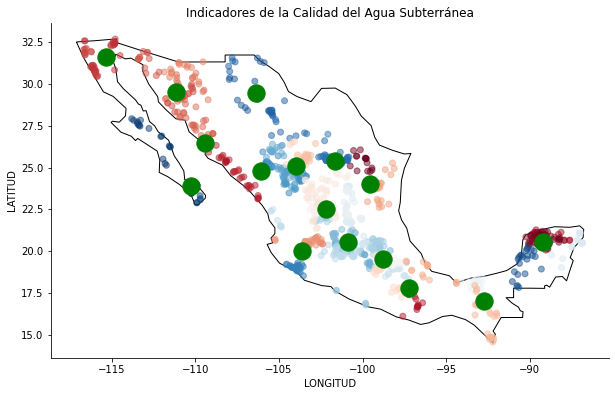

In [47]:
#Generamos los puntos en el mapa
puntos_en_mapa = gpd.GeoDataFrame(df_ubi, geometry="COORDENADAS")

#Generamos el mapa
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
world.name.unique()

fig, gax = plt.subplots(figsize=(10,10))

#Seleccionamos México
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

# Declaramos los ejes X y Y
gax.set_xlabel('LONGITUD')
gax.set_ylabel('LATITUD')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
gax.set_title('Indicadores de la Calidad del Agua Subterránea')

#Imprimimos todos los puntos
puntos_en_mapa.plot(ax=gax, cmap='RdBu_r', alpha = 0.5)
#Imprimimos los clusters
gdf_C.plot(ax=gax, color='green', alpha = 1, markersize = 300) #Graficamos los puntos principales encontrados con el Kmean


### Clusters y puntos en color para mapa de México

Asignaremos un número de cluster [0-16] para cada uno de los puntos en el mapa.

In [48]:
puntos_en_mapa['COLOR']= y['SEMAFORO']
puntos_en_mapa['CLUSTER'] = labels

puntos_en_mapa

LONGITUD   LATITUD                  COORDENADAS  COLOR  CLUSTER
0    -102.02210  22.20887  POINT (-102.02210 22.20887)  Verde       13
1    -102.20075  21.99958  POINT (-102.20075 21.99958)  Verde       13
2    -102.28801  22.36685  POINT (-102.28801 22.36685)   Rojo       13
3    -102.29449  22.18435  POINT (-102.29449 22.18435)  Verde       13
4    -110.24480  23.45138  POINT (-110.24480 23.45138)   Rojo       10
...         ...       ...                          ...    ...      ...
1063  -99.54191  24.76036   POINT (-99.54191 24.76036)   Rojo       11
1064  -99.70099  24.78280   POINT (-99.70099 24.78280)   Rojo       11
1065  -99.82249  25.55197   POINT (-99.82249 25.55197)   Rojo       11
1066 -100.32683  24.80118  POINT (-100.32683 24.80118)  Verde       11
1067 -100.73302  25.09380  POINT (-100.73302 25.09380)  Verde        5

[1068 rows x 5 columns]

El **nuevo_dataset** almacena los datos de los puntos en el mapa para cada cluster

In [49]:
lista_de_modas=[]

for i in range(0,16): # Recorremos 16  veces
  nuevo_dataset = pd.DataFrame() #Creamos un dataframe vacío

  #Se copia cada sección del DataFrame según el Cluster
  nuevo_dataset = puntos_en_mapa[puntos_en_mapa.CLUSTER == i].copy()
  
  #Aquí creamos la moda de cada color
  moda = nuevo_dataset['COLOR'].mode()[0] 

  #Vamos añadiendo la moda, nos va a dar una lista de 16 elementos
  lista_de_modas.append(moda) 

len(lista_de_modas)

16

In [50]:
#Ahora sumamos la columna de moda por cluster al data set de clusters
gdf_C['MODA'] = lista_de_modas
gdf_C.shape

(16, 4)

In [51]:
gdf_C['MODA']

0         Rojo
1     Amarillo
2         Rojo
3        Verde
4        Verde
5     Amarillo
6        Verde
7        Verde
8     Amarillo
9        Verde
10        Rojo
11    Amarillo
12        Rojo
13        Rojo
14       Verde
15        Rojo
Name: MODA, dtype: object

In [52]:
gdf_C['MODA'].value_counts()

Rojo        6
Verde       6
Amarillo    4
Name: MODA, dtype: int64

In [53]:
puntos_en_mapa['COLOR'].value_counts()

Verde       434
Rojo        387
Amarillo    247
Name: COLOR, dtype: int64

In [54]:
#Se debe de convertir la lista de Español a Inglés para que geopandas pueda leerla.
#Esto sería para la lista de modas que sólo tiene 16 valores
list_col_EN = []

for i in range(0,16):
  if lista_de_modas[i] == 'Verde':
    list_col_EN.append('green')
  if lista_de_modas[i] == 'Rojo':
    list_col_EN.append('red')
  if lista_de_modas[i] == 'Amarillo':
    list_col_EN.append('yellow')

len(list_col_EN)

16

In [55]:
puntos_en_mapa.shape

(1068, 5)

In [56]:
# Esta lista sería para cada uno de los 1068 valores de nuestro registro
list_col_EN_individual = []

for i in range(0,1068):
  if puntos_en_mapa.COLOR[i] == 'Verde':
    list_col_EN_individual.append('green')
  if puntos_en_mapa.COLOR[i] == 'Rojo':
    list_col_EN_individual.append('red')
  if puntos_en_mapa.COLOR[i] == 'Amarillo':
    list_col_EN_individual.append('yellow')

len(list_col_EN_individual)

1068

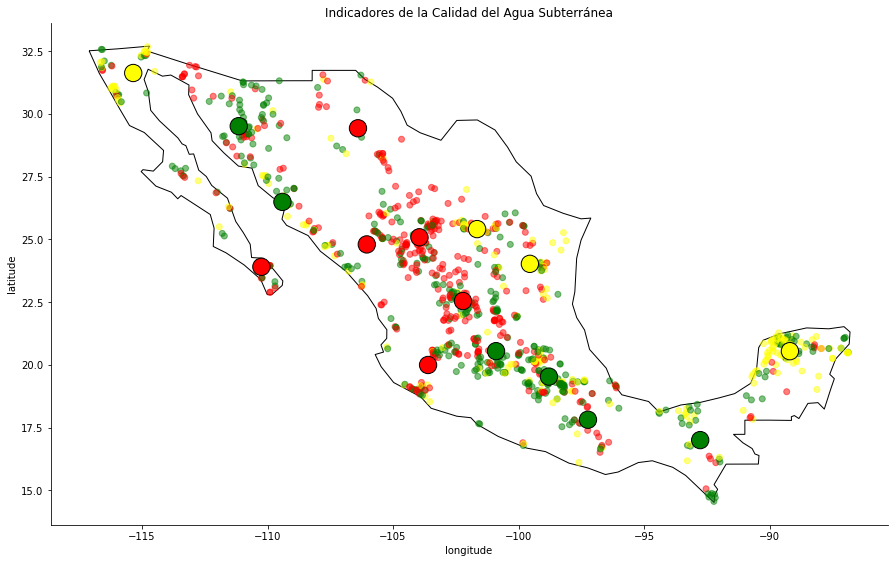

In [57]:
#ahora visualizaremos los centroides ajustando el color de la moda
fig, gax = plt.subplots(figsize=(15,10)) #Espacio de gráfico

color_asig = []

#Se van agregando los colores
for row in range(0,len(list_col_EN)):
  color_asig.append(list_col_EN[row])

#Seleccionamos el mapa de México
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white') #filtramos por pais

#Todos los puntos se imprimen usando su color de Semáforo
puntos_en_mapa.plot(ax=gax, color=list_col_EN_individual, alpha = 0.5)

#Se imprimen los clusters usando el color de la moda
gdf_C.plot(ax=gax, color=color_asig, alpha = 1, markersize = 300, edgecolor='black') 

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Indicadores de la Calidad del Agua Subterránea')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

## **Conclusiones**

- El proceso de limpieza de los datos es fundamental, dado que sí analizamos los datos sin ningún tipo de limpieza y calidad de datos los análisis no serán confiables, adicionalmente para la realización del análisis exploratorio se consideraron únicamente variables numéricas, por lo que debíamos garantizar que los datos realmente fuesen valores numéricos, y para ello se tuvo que reemplazar la cadena y/o símbolo '<' en algunos datos que se inferían cómo numéricos para el análisis, pero que con este símbolo los datos no estaban aptos para su uso. 
- Podemos definir a la calidad del dato cómo “datos aptos para el uso”, es decir que se puedan graficar, agregar, calcular estadísticas descriptivas como la *media, mediana, max, min, std y conteos para las columnas que consideramos numéricas*, entre otros, es por ello que sí los datos no son aptos para su uso, podemos concluir que no son datos usables, y que deberemos hacer un ejercicio exploratorio con Python u otras herramientas, como por ejemplo Open Refine - https://openrefine.org/ para identificar fácilmente errores sistemáticos tales como celdas en blanco, valores nulos, valores duplicados, valores no estandarizados, inconsistencias de ortografía, inconsistencias en tipos de datos, datos sucios, entre otros, para luego proceder a limpiar los datos y prepararlos para su uso.
- Con los gráficos de bigotes se evidenciaron *outliers muy lejanos y atípicos* para la variable **SDT_M_mg/L**, debido a que se encontraban fuera del rango normal establecido por la tabla de determinación de calidad, además de no estar nada cercano a los demás valores de la variable, por ello se estableció como límite el valor de la variable hasta 25000, y aquellos que datos que estaban fuera de este límite se eliminaron (2 registros) con el fin de que estos datos atípicos no afecten luego el análisis exploratorio de los datos y/o el modelo a desarrollarse.
- Se realizó un análisis de correlación de los datos con las variables independientes y dependientes con el fin de identificar que variables presentaban la mayor correlación, para tenerlas en cuenta en la formulación del modelo de predicción a implementarse. 
- Se realizó un análisis de componentes principales (PCA), en donde se seleccionaron aquellos componentes que más aportan al total de la varianza explicada, concluyendo que con 7 componentes se obtiene una varianza acumulada de **77.42%**, y con 8 componentes se obtienen una varianza acumulada de **84.15%**. Por lo anterior, tan sólo se requieren de 6 a 8 componentes para utilizar en el modelo a implementar, dado que normalmente se aconseja llegar al menos al 80% del total de varianza explicada. Llegar al **80%** significa reducción de dimensionalidad y del conjunto de datos original.
- Para determinar el número de clústeres a utilizar en el método de agrupamiento de k-means, se realizó un **gráfico de codos** en un rango de 10 a 30 en las abscisas, con el fin de determinar el valor en el eje X en el que la pendiente disminuya su valor y presente un cambio en la tendencia de la curva, que para en caso de nuestro análisis se identificó que este cambio se daba en el **valor 16** del eje X, es por ello que se tomo este valor como el valor del  número de clústeres a utilizar en el método de k-means.
- Se utilizaron **16 clústeres** para agrupar los datos, arrojando algunas relaciones de los grupos de clústeres, por ejemplo en la zonas Occidente y Noreste de México se identificó que es en donde se presentan la mayor cantidad de puntos rojos y de agrupaciones de los clústeres, dado que de los 16 clústeres en total se identificaron según la moda de estos: **6 rojos, 4 amarillos y 6 verdes**, de los cuales alrededor de 4 grupos de clústeres de color rojo, se encuentran en estos estados de México, indicando que la calidad del agua en esta ubicación geográfica es mala, es decir para la región **Noreste y Occidente**, consumen la peor agua de México.
- La mejor calidad del agua se puede ver representada según el análisis y el mapa de referencia del Diario oficial de la Federación, en parte del **Centro, Noroeste y el Sureste** de México, en algunos de sus estados posiblemente se consume la mejor agua de México, esto desde un análisis general de acuerdo al mapa obtenido y la comparación con el mapa dispuesto a continuación.

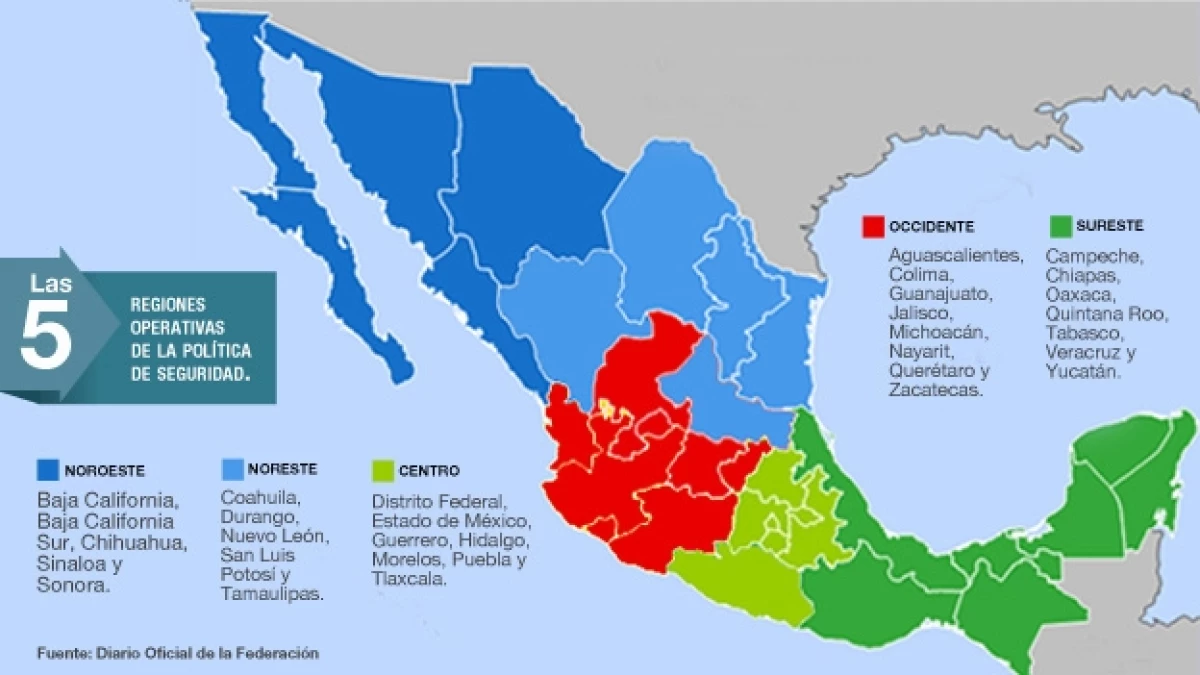

# Entrega 2: 18 de Noviembre

## Preparación de X y y

In [142]:
scaled_df_agua.columns

Index(['ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L',
       'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L',
       'CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L',
       'FE_TOT_mg/L'],
      dtype='object')

In [59]:
X = scaled_df_agua

In [60]:
y.drop([37],axis=0, inplace=True)
y.drop([740],axis=0, inplace=True)

In [61]:
print(df_agua_sub_num.shape)
print(y.shape)

(1066, 14)
(1066, 1)


In [62]:
y.head()

SEMAFORO
0    Verde
1    Verde
2     Rojo
3    Verde
4     Rojo

### Aplicando LabelEncoder a la salida

In [63]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y['SEMAFORO'] = encoder.fit_transform(y['SEMAFORO'])

y.head()


SEMAFORO
0         2
1         2
2         1
3         2
4         1

In [124]:
y['SEMAFORO'].unique()

array([2, 1, 0])

In [125]:
#Verde: 2, Rojo: 1, Amarillo: 0 

## Train Test split

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Decision trees

Alimentamos el modelo con los datos de entrenamiento, se buscó un max_depth óptimo, teniendo como resultado el número 12.

In [127]:
tree_clf = DecisionTreeClassifier(max_depth=12, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=12, random_state=42)

Nuestras salidas están señaladas como 0,1,2 debido al LabelEncoder, sin embargo para imprimir los resultados lo mejor es agregar las etiquetas de los nombres.

In [128]:
y_train['SEMAFORO'].unique()

array([0, 2, 1])

Exportamos los datos generados por el modelo hacia una variable que nos permitirá graficar

In [136]:
dot_data = export_graphviz(tree_clf,
                                  out_file=None,
                            feature_names = X_train.columns,
                            class_names = ['Amarillo', 'Rojo', 'Verde'],
                            rounded=True,
                            filled=True)
 

Convertimos los datos en una imagen png y luego la mostramos en pantalla.

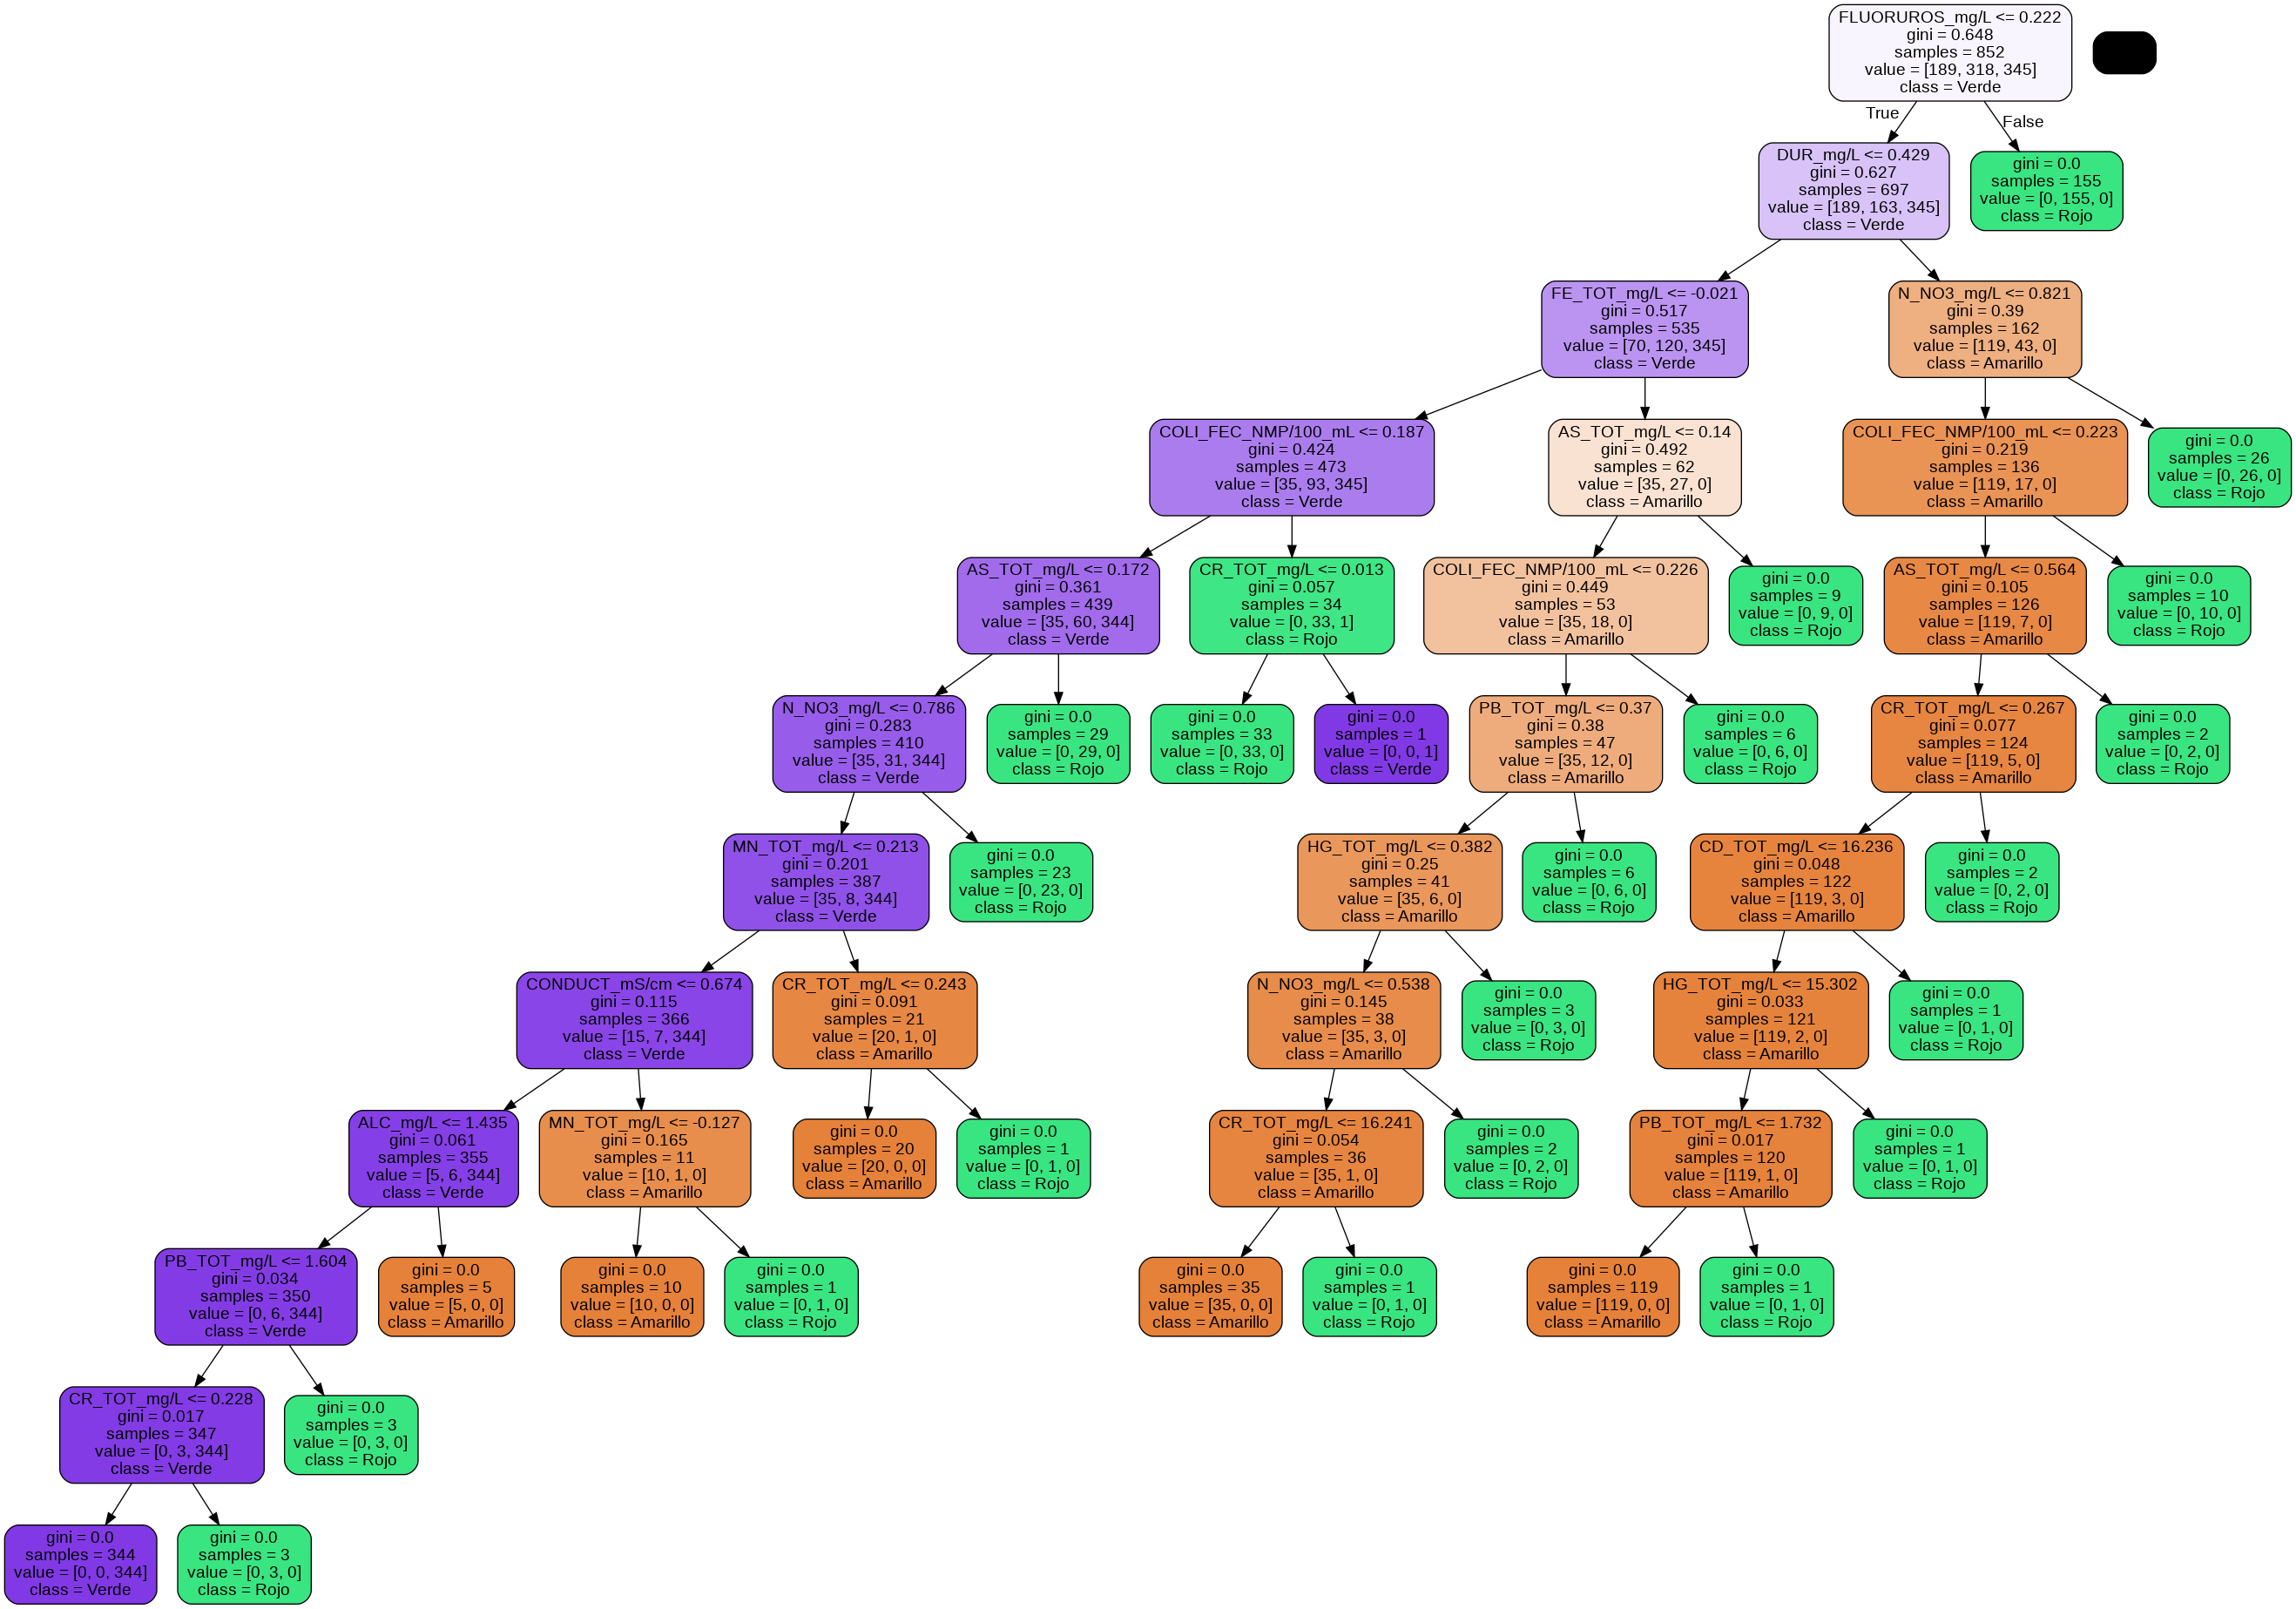

In [137]:
import pydotplus
from IPython.display import Image

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('Semaforo.png')
Image(filename = 'Semaforo.png')

### Accuracy

In [138]:
from sklearn.metrics import accuracy_score

y_pred = tree_clf.predict(X_test)

acc = accuracy_score(y_test,y_pred)

acc.round(3)

0.972

Nuestro modelo obtuvo un resutado de **0.972**, un resultado bastante alto de predicción del modelo.

In [139]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def mi_accuracy(yreal, ypred):
  cm = confusion_matrix(yreal, ypred)
  VPC1 = cm[0,0]
  VPC2 = cm[1,1]
  VPC3 = cm[2,2]
  vp = VPC1 + VPC2 + VPC3

  FPC1 = cm[0,1] + cm[0,2]
  FPC2 = cm[1,0] + cm[1,2]
  FPC3 = cm[2,0] + cm[2,1]
  fp = FPC1 + FPC2 + FPC3
  
  FNC1 = cm[1,0] + cm[2,0]
  FNC2 = cm[0,1] + cm[2,1]
  FNC3 = cm[0,2] + cm[1,2]
  fn = FNC1 + FNC2 + FNC3

  VNC1 = cm[1,1] + cm[1,2] + cm[2,1] + cm[2,2]
  VNC2 = cm[0,0] + cm[0,2] + cm[2,0] + cm[2,2]
  VNC3 = cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]
  vn = VNC1 + VNC2 + VNC3

  return (vp+vn)/(vp+vn+fp+fn+np.finfo(np.float32).eps)
#Adivinen quien compartio el codigo?, exacto, karlton, no no fue rigo, bueno esta bien, si fue rigo.


In [140]:
print('Accuracy: ', mi_accuracy(y_test, y_pred))

Accuracy:  0.9813084110327398


In [120]:
tree_clf.feature_importances_

array([0.01756994, 0.03375752, 0.        , 0.20812564, 0.17626471,
       0.11333151, 0.13623245, 0.09560354, 0.00347768, 0.02806471,
       0.0120869 , 0.02801958, 0.06502996, 0.08243586])

### Feature Importance

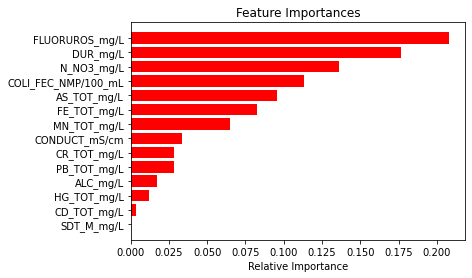

In [79]:
importances = tree_clf.feature_importances_
indices = np.argsort(importances)
features= X_test.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

rdm_clf = RandomForestClassifier(max_depth=12, random_state=42, class_weight='balanced')
rdm_clf = rdm_clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [85]:
rdm_clf_datos = rdm_clf[10]
dot_data_rdm= export_graphviz (rdm_clf_datos,
                        out_file = None,
                        feature_names= X_train.columns,
                        class_names = ['Amarllo','Rojo','Verde'],
                        rounded = True,
                        filled = True)

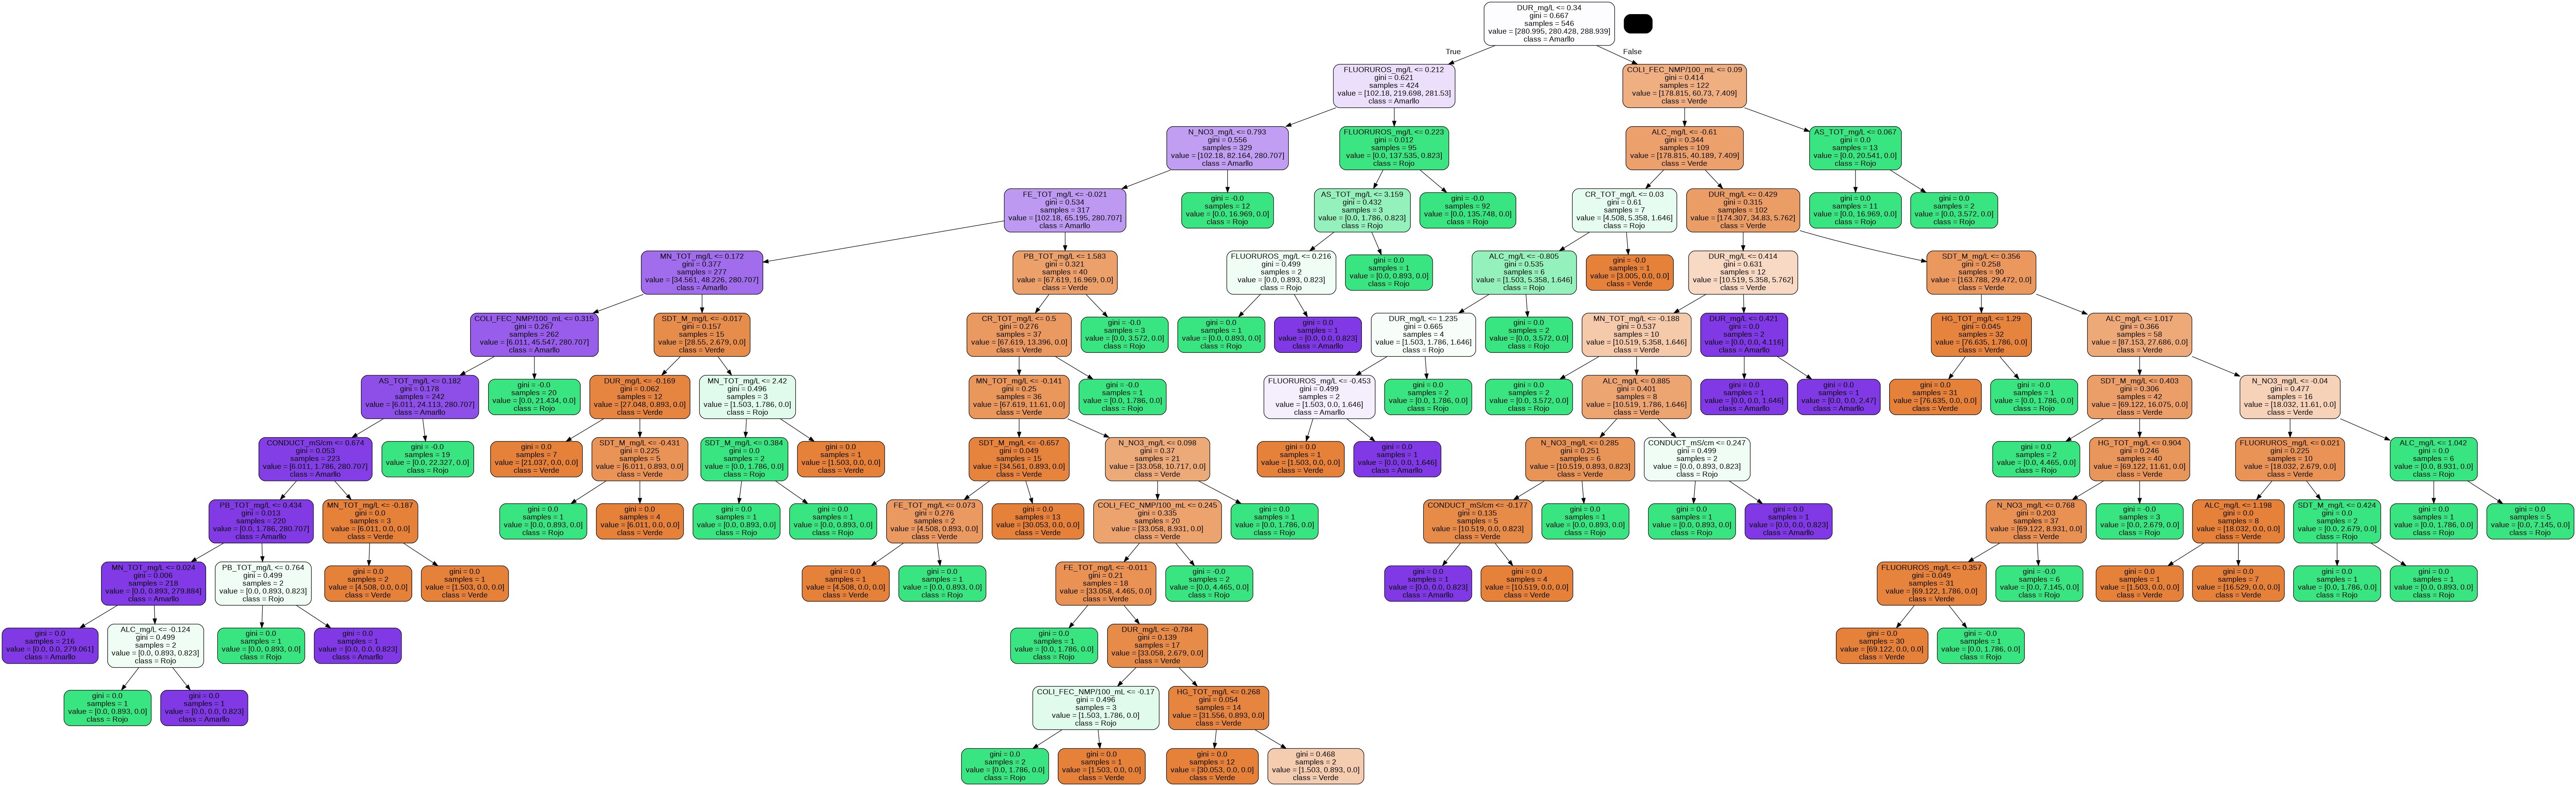

In [86]:
graph = pydotplus.graph_from_dot_data(dot_data_rdm)
graph.write_png('RandomForest.png')
Image(filename = 'RandomForest.png')

### Feature Importance

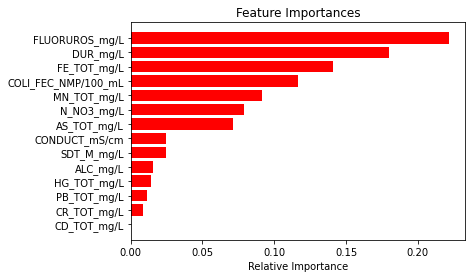

In [121]:
importances = rdm_clf_datos.feature_importances_
indices = np.argsort(importances)
features= X_test.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Accuracy

In [88]:
y_pred_rdm = rdm_clf.predict(X_test)

acc = accuracy_score(y_test,y_pred_rdm)

acc.round(3)

0.953

In [89]:
print('Accuracy: ', mi_accuracy(y_test, y_pred_rdm))

Accuracy:  0.9688473518450225


## Comparación

Veamos la comparación de los clasificadores

In [91]:
from sklearn.ensemble import VotingClassifier
classifiers = [
                ['DecisionTree :',tree_clf],
                ['RandomForest :',rdm_clf] 
              ]
              
predictions_df = pd.DataFrame()
predictions_df['action'] = y_test

for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, np.ravel(y_train))
    predictions = classifier.predict(X_test)
    predictions_df[name.strip(" :")] = predictions
    print(name, mi_accuracy(y_test, predictions))

DecisionTree : 0.9813084110327398
RandomForest : 0.9688473518450225


Cómo resultado obtuvimos que el **DecisionTree** presenta un valor más alto de precisión que el **RandomForest**.

In [144]:
eclf1 = VotingClassifier(estimators=[ ('DecisionTree :' , tree_clf),('RandomForest :',rdm_clf)], voting='soft')
eclf1.fit(X_train, np.ravel(y_train))
predictions = eclf1.predict(X_test)
print("Votos Soft")
target_names = ['Amarillo', 'Rojo', 'Verde']
print(classification_report(y_test, predictions, target_names=target_names))
print("\n")

eclf2 = VotingClassifier(estimators=[  ('DecisionTree :' , tree_clf),('RandomForest :',rdm_clf)], voting='hard')
eclf2.fit(X_train, np.ravel(y_train))
predictions2 = eclf2.predict(X_test)
print("Votos Hard")
print(classification_report(y_test, predictions2, target_names=target_names))

Votos Soft
              precision    recall  f1-score   support

    Amarillo       0.98      0.93      0.95        56
        Rojo       0.93      0.99      0.96        69
       Verde       1.00      0.99      0.99        89

    accuracy                           0.97       214
   macro avg       0.97      0.97      0.97       214
weighted avg       0.97      0.97      0.97       214



Votos Hard
              precision    recall  f1-score   support

    Amarillo       0.95      0.98      0.96        56
        Rojo       0.94      0.99      0.96        69
       Verde       1.00      0.94      0.97        89

    accuracy                           0.97       214
   macro avg       0.96      0.97      0.97       214
weighted avg       0.97      0.97      0.97       214



> Al momento de utilizar una votación *'hard'*, vemos que los modelos están bastantes similares en sus valores de resultado, por lo que sería recomensable seguir haciendo pruebas para ver el comportamiento de ambos.

## Matriz de confusión

Creamos una función que tenga los parámetros

In [109]:
def CM_modelo(modelo,X,y,X_test,y_test):

    modelo.fit(X, y)

    yhat = modelo.predict(X_test)

    cm = confusion_matrix(y_test, yhat)

    txt = ['P[0,0]','[P0,1]','[P0,2]',
       '[P1,0]','[P1,1]','[P1,2]',
       '[P2,0]','[P2,1]','[P2,2]',]
    frecuencia = ["{0:0.0f}".format(value) for value in cm.flatten()]
    porcentaje = ["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(txt,frecuencia,porcentaje)]
    labels = np.asarray(labels).reshape(3,3)
    labels
    ax = sns.heatmap(cm, annot=labels, fmt='', cmap='RdBu_r', cbar=False)
    ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
    plt.show()


### Resultados



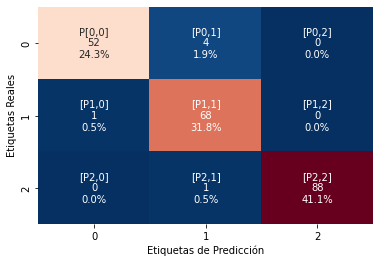

In [110]:
CM_modelo(tree_clf,X_train,np.ravel(y_train),X_test,np.ravel(y_test))


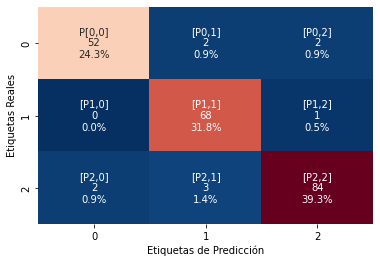

In [111]:
CM_modelo(rdm_clf,X_train,np.ravel(y_train),X_test,np.ravel(y_test))


## Conclusiones

* Se aplicó un preprocesamiento de Label Encoder a la salida del semáforo para reemplazar los nombres de las salidas por datos numéricos. Resultando de la siguiente forma: **{Verde: 2, Rojo: 1, Amarillo: 0}.**

* Después  separamos los datos en **Train (80%)** y **Test(20%)**. Esto para entrenar nuestros datos, predecir resultados y realizar la comparación con nuestro Test.

* Comenzamos usando un modelo clasificador por medio de *Decision Tree* Donde obtuvimos un **accuracy de 0.981**. Asu vez, obtuvimos los resultados medianate de un gráfico de las variables que mayor impacto esán teniendo en nuestro modelo a través del **feature_importance**; siendo la variable de **Fluoruros, Dureza y NO3 (Nitrato)** las más importantes.

* También, usamos otro modelo clasificador, en este caso el *Random Forest*. En el cual se obtuvo un **accuracy de 0.968**. De la misma manera  que el *Decision Tree*, obtuvimos las **variables con mayor impacto**, las cuales fueron **Fluoruros, Dureza y FE_TOT (Hierro)**, muy similares a Decision Tree.

* Al hacer la comparación de nuestros clasificadores optenemos que por poco el que tiene **mejores rendimientos** generales es el *Decision Tree* sobre el *Random Forest*.

* Por último, presentamos la matríz de confusión de ambos modelos para evaluar los resultados. Es importante destacar que el *Decision Tree* se desenvolvío mejor que el *Random Forest* para el caso de valores dentro del **semáforo verde de la calidad del agua**. Es por este particular valor de salida que nuestro modelo de *Decision Tree* ha tenido mejor desempeño.


> Es importante tomar en cuenta que según el reporte **INDICADORES DE LA CALIDAD DEL AGUA SUPERFICIAL Y SUBTERRÁNEA** por la
*RED NACIONAL DE MEDICIÓN DE LA CALIDAD DEL AGUA (RENAMECA)*. Dice lo siguiente:

> *'La medición de la calidad del agua subterránea se realiza empleando como referencia los estándares nacionales e internacionales para el agua de consumo Sin embargo, la calidad del agua se mide en la fuente de abastecimiento, es decir, en su condición natural, sin tratamiento o potabilización'*

> Por lo que los principales indicadores para la calidad de agua en su fuente de abastecimiento son:

* Arsénico Total
* Plomo Total
* Mercurio Total
* Cadmio Total
* Fluoruros Totales
* Coliformes Fecales

> Nuestro modelo clasificador tomó la importancia de las variables similar a lals que se muestra en la lista sin necesidad de haber sido ajustado únicamente con estas, por lo que nuestro modelo es capaz de predecir la calidad del agua de un pozo considerando todos los datos numéricos presentados.